# Primary TypeÍ≥º ÏãúÍ∞ÑÎåÄ Í∞Ñ Í¥ÄÎ†®ÏÑ± ‚Äî Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from decimal import Decimal

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('/content/drive/MyDrive/chicago dataset/crime_data_final.csv')

In [ ]:
print(df.isna().sum())

Unnamed: 0                 0
ID                         0
Case Number                7
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1990
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area           495
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                   0
Hour                       0
Month                      0
TimePeriod                 0
Î≤îÏ£ÑÌïúÍ∏Ä                       0
dtype: int64


In [ ]:
type_translation = {
    'ARSON': 'Î∞©Ìôî',
    'ASSAULT': 'Ìè≠ÌñâÏúÑÌòë',
    'BATTERY': 'Ìè≠Ìñâ',
    'BURGLARY': 'Ï£ºÍ±∞Ïπ®ÏûÖ',
    'CONCEALED CARRY LICENSE VIOLATION': 'Ï¥ùÍ∏∞ÏÜåÏßÄÌóàÍ∞Ä ÏúÑÎ∞ò',
    'CRIM SEXUAL ASSAULT': 'Í∞ïÍ∞Ñ',
    'CRIMINAL DAMAGE': 'Ïû¨ÏÇ∞ÏÜêÍ¥¥',
    'CRIMINAL TRESPASS': 'Î¨¥Îã®Ïπ®ÏûÖ',
    'DECEPTIVE PRACTICE': 'ÏÇ¨Í∏∞',
    'DOMESTIC VIOLENCE': 'Í∞ÄÏ†ïÌè≠Î†•',
    'GAMBLING': 'ÎèÑÎ∞ï',
    'HOMICIDE': 'ÏÇ¥Ïù∏',
    'HUMAN TRAFFICKING': 'Ïù∏Ïã†Îß§Îß§',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Í≥µÎ¨¥ÏßëÌñâÎ∞©Ìï¥',
    'INTIMIDATION': 'ÌòëÎ∞ï',
    'KIDNAPPING': 'Ïú†Í¥¥',
    'LIQUOR LAW VIOLATION': 'Ï£ºÎ•òÎ≤ï ÏúÑÎ∞ò',
    'MOTOR VEHICLE THEFT': 'Ï∞®ÎüâÏ†àÎèÑ',
    'NARCOTICS': 'ÎßàÏïΩ',
    'NON - CRIMINAL': 'ÎπÑÎ≤îÏ£Ñ',
    'NON-CRIMINAL': 'ÎπÑÎ≤îÏ£Ñ',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'ÎπÑÎ≤îÏ£Ñ(ÌäπÏ†ïÎåÄÏÉÅ)',
    'OBSCENITY': 'Ïô∏ÏÑ§ÌñâÏúÑ',
    'OFFENSE INVOLVING CHILDREN': 'ÏïÑÎèôÎ≤îÏ£Ñ',
    'OTHER NARCOTIC VIOLATION': 'Í∏∞ÌÉÄ ÎßàÏïΩ Î≤îÏ£Ñ',
    'OTHER OFFENSE': 'Í∏∞ÌÉÄÎ≤îÏ£Ñ',
    'PROSTITUTION': 'ÏÑ±Îß§Îß§',
    'PUBLIC INDECENCY': 'Í≥µÍ≥µÏô∏ÏÑ§',
    'PUBLIC PEACE VIOLATION': 'Í≥µÍ≥µÏßàÏÑúÏúÑÎ∞ò',
    'RITUALISM': 'ÏùòÏãùÏ†Å Î≤îÏ£Ñ',
    'ROBBERY': 'Í∞ïÎèÑ',
    'SEX OFFENSE': 'ÏÑ±Î≤îÏ£Ñ',
    'STALKING': 'Ïä§ÌÜ†ÌÇπ',
    'THEFT': 'Ï†àÎèÑ',
    'WEAPONS VIOLATION': 'Î¨¥Í∏∞ÏÜåÏßÄ ÏúÑÎ∞ò'
}

In [ ]:
# ÎÇ†Ïßú ÌååÏã± Î∞è ÏãúÍ∞ÑÎåÄ Î∂ÑÎ•ò
df['Hour'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.hour

def get_time_period(hour):
    if pd.isnull(hour): return None
    if 0 <= hour < 6:
        return 'ÏÉàÎ≤Ω'
    elif 6 <= hour < 12:
        return 'Ïò§Ï†Ñ'
    elif 12 <= hour < 18:
        return 'Ïò§ÌõÑ'
    else:
        return 'Ï†ÄÎÖÅ'

df['TimePeriod'] = df['Hour'].apply(get_time_period)

# Î≤îÏ£ÑÏú†ÌòïÏùÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôòÌïòÏó¨ ÍµêÏ∞®Ìëú ÏÉùÏÑ±
ct_year = pd.crosstab(df['Primary Type'].map(type_translation).fillna('Í∏∞ÌÉÄ'), df['Year'])

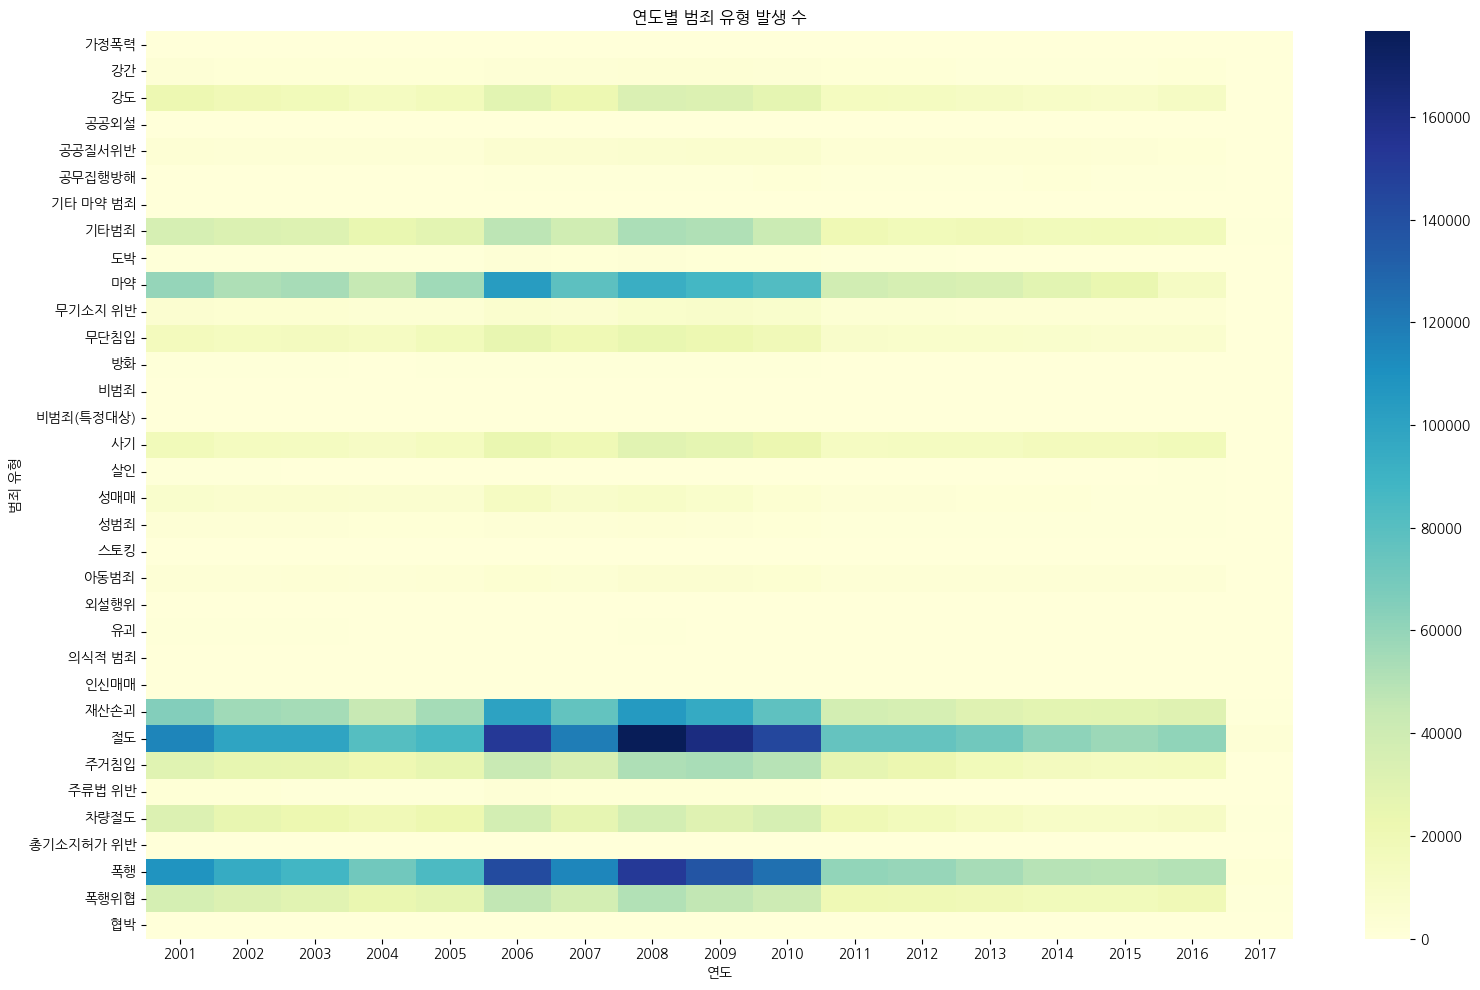

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 10))
sns.heatmap(ct_year, cmap='YlGnBu')
plt.title('Ïó∞ÎèÑÎ≥Ñ Î≤îÏ£Ñ Ïú†Ìòï Î∞úÏÉù Ïàò')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Î≤îÏ£Ñ Ïú†Ìòï')
plt.tight_layout()
plt.show()

In [ ]:
# ÎÇ†Ïßú ÌòïÏãù ÏßÄÏ†ïÌï¥ Í≤ΩÍ≥† Î∞©ÏßÄ
df['Hour'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.hour

# ÏãúÍ∞ÑÎåÄ Î∂ÑÎ•ò Ìï®Ïàò
def get_time_period(hour):
    if pd.isnull(hour): return None
    if 0 <= hour < 6:
        return 'ÏÉàÎ≤Ω'
    elif 6 <= hour < 12:
        return 'Ïò§Ï†Ñ'
    elif 12 <= hour < 18:
        return 'Ïò§ÌõÑ'
    else:
        return 'Ï†ÄÎÖÅ'

# ÏãúÍ∞ÑÎåÄ Ïª¨Îüº ÏÉùÏÑ±
df['TimePeriod'] = df['Hour'].apply(get_time_period)

# ‚úÖ 1. Top 10 Primary Type vs ÏãúÍ∞ÑÎåÄ
top10 = df['Primary Type'].value_counts().nlargest(10).index
df['Primary Type Top10'] = df['Primary Type'].apply(lambda x: x if x in top10 else 'Í∏∞ÌÉÄ')

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
ct_top10 = pd.crosstab(df['Primary Type Top10'], df['TimePeriod'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2_t10, p_t10, dof_t10, _ = chi2_contingency(ct_top10)
print("[Top 10 Primary Type vs ÏãúÍ∞ÑÎåÄ]")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2_t10:.2f}, p-value: {p_t10:.4f}, ÏûêÏú†ÎèÑ: {dof_t10}")

alpha = 0.05
if p_t10 < alpha:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Î≤îÏ£Ñ Ïú†ÌòïÍ≥º ÏãúÍ∞ÑÎåÄÎäî Í¥ÄÎ†® ÏûàÏùå")
else:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù: Î≤îÏ£Ñ Ïú†ÌòïÍ≥º ÏãúÍ∞ÑÎåÄÎäî Í¥ÄÎ†® ÏóÜÏùå")

[Top 10 Primary Type vs ÏãúÍ∞ÑÎåÄ]
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 338939.21, p-value: 0.0000, ÏûêÏú†ÎèÑ: 30
‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Î≤îÏ£Ñ Ïú†ÌòïÍ≥º ÏãúÍ∞ÑÎåÄÎäî Í¥ÄÎ†® ÏûàÏùå


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 1. ÏãúÍ∞ÑÎåÄ ÌååÏÉù
def get_time_period(hour):
    if pd.isnull(hour): return None
    if 0 <= hour < 6: return 'ÏÉàÎ≤Ω'
    elif 6 <= hour < 12: return 'Ïò§Ï†Ñ'
    elif 12 <= hour < 18: return 'Ïò§ÌõÑ'
    else: return 'Ï†ÄÎÖÅ'

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['TimePeriod'] = df['Hour'].apply(get_time_period)

# 2. Primary Type ‚Üí ÌïúÍ∏Ä Îß§Ìïë
type_translation = {
    'ARSON': 'Î∞©Ìôî', 'ASSAULT': 'Ìè≠ÌñâÏúÑÌòë', 'BATTERY': 'Ìè≠Ìñâ',
    'BURGLARY': 'Ï£ºÍ±∞Ïπ®ÏûÖ', 'CRIM SEXUAL ASSAULT': 'Í∞ïÍ∞Ñ',
    'CRIMINAL DAMAGE': 'Ïû¨ÏÇ∞ÏÜêÍ¥¥', 'CRIMINAL TRESPASS': 'Î¨¥Îã®Ïπ®ÏûÖ',
    'DECEPTIVE PRACTICE': 'ÏÇ¨Í∏∞', 'DOMESTIC VIOLENCE': 'Í∞ÄÏ†ïÌè≠Î†•',
    'GAMBLING': 'ÎèÑÎ∞ï', 'HOMICIDE': 'ÏÇ¥Ïù∏', 'HUMAN TRAFFICKING': 'Ïù∏Ïã†Îß§Îß§',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Í≥µÎ¨¥ÏßëÌñâÎ∞©Ìï¥', 'INTIMIDATION': 'ÌòëÎ∞ï',
    'KIDNAPPING': 'Ïú†Í¥¥', 'LIQUOR LAW VIOLATION': 'Ï£ºÎ•òÎ≤ï ÏúÑÎ∞ò',
    'MOTOR VEHICLE THEFT': 'Ï∞®ÎüâÏ†àÎèÑ', 'NARCOTICS': 'ÎßàÏïΩ',
    'NON - CRIMINAL': 'ÎπÑÎ≤îÏ£Ñ', 'NON-CRIMINAL': 'ÎπÑÎ≤îÏ£Ñ',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'ÎπÑÎ≤îÏ£Ñ(ÌäπÏ†ïÎåÄÏÉÅ)', 'OBSCENITY': 'Ïô∏ÏÑ§ÌñâÏúÑ',
    'OFFENSE INVOLVING CHILDREN': 'ÏïÑÎèôÎ≤îÏ£Ñ', 'OTHER NARCOTIC VIOLATION': 'Í∏∞ÌÉÄ ÎßàÏïΩ Î≤îÏ£Ñ',
    'OTHER OFFENSE': 'Í∏∞ÌÉÄÎ≤îÏ£Ñ', 'PROSTITUTION': 'ÏÑ±Îß§Îß§', 'PUBLIC INDECENCY': 'Í≥µÍ≥µÏô∏ÏÑ§',
    'PUBLIC PEACE VIOLATION': 'Í≥µÍ≥µÏßàÏÑúÏúÑÎ∞ò', 'RITUALISM': 'ÏùòÏãùÏ†Å Î≤îÏ£Ñ',
    'ROBBERY': 'Í∞ïÎèÑ', 'SEX OFFENSE': 'ÏÑ±Î≤îÏ£Ñ', 'STALKING': 'Ïä§ÌÜ†ÌÇπ',
    'THEFT': 'Ï†àÎèÑ', 'WEAPONS VIOLATION': 'Î¨¥Í∏∞ÏÜåÏßÄ ÏúÑÎ∞ò'
}
df['Î≤îÏ£ÑÌïúÍ∏Ä'] = df['Primary Type'].map(type_translation).fillna('Í∏∞ÌÉÄ')

# 3. Í≤∞Ï∏°Í∞í Ï†úÍ±∞
df_clean = df.dropna(subset=['TimePeriod', 'Î≤îÏ£ÑÌïúÍ∏Ä'])

# 4. ÍµêÏ∞®Ìëú ÏÉùÏÑ±
ct = pd.crosstab(df_clean['Î≤îÏ£ÑÌïúÍ∏Ä'], df_clean['TimePeriod'])

# 5. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(ct)

print("[Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï] Î≤îÏ£ÑÏú†Ìòï vs ÏãúÍ∞ÑÎåÄ")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"ÏûêÏú†ÎèÑ: {dof}")

# 6. Cram√©r's V Í≥ÑÏÇ∞
n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cram√©r's V (Ìö®Í≥º ÌÅ¨Í∏∞): {cramers_v:.4f}")


[Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï] Î≤îÏ£ÑÏú†Ìòï vs ÏãúÍ∞ÑÎåÄ
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 399507.49
p-value: 0.0000
ÏûêÏú†ÎèÑ: 99
Cram√©r's V (Ìö®Í≥º ÌÅ¨Í∏∞): 0.1295


In [ ]:
# ÌïúÍ∏ÄÌôî
!pip install koreanize-matplotlib
import koreanize_matplotlib

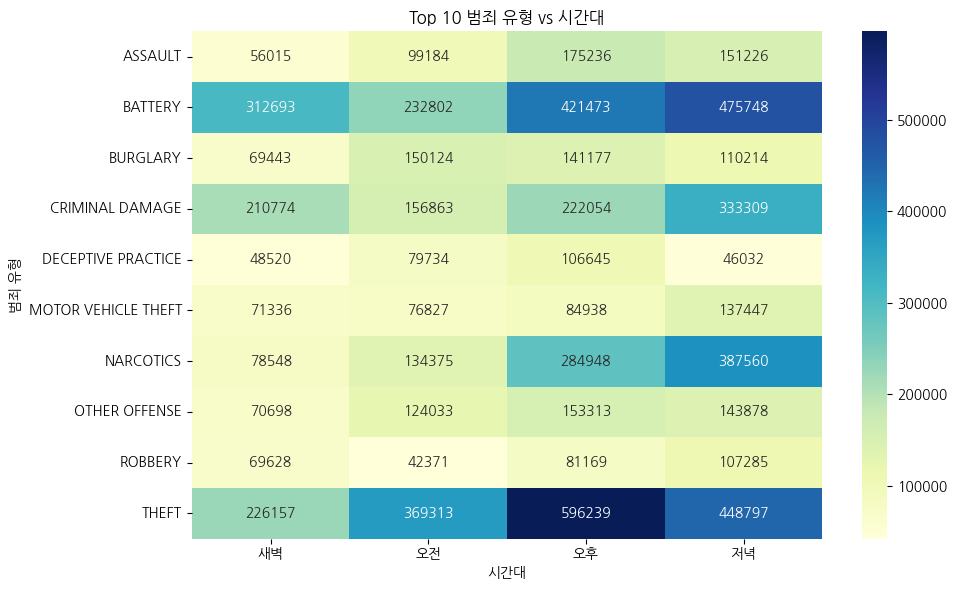

In [ ]:
# ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(ct_top10, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 Î≤îÏ£Ñ Ïú†Ìòï vs ÏãúÍ∞ÑÎåÄ')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('Î≤îÏ£Ñ Ïú†Ìòï')
plt.tight_layout()
plt.show()

In [ ]:
def group_primary_type(x):
    if x in ['THEFT', 'BURGLARY', 'ROBBERY']:
        return 'Ïû¨ÏÇ∞Î≤îÏ£Ñ'
    elif x in ['BATTERY', 'ASSAULT', 'SEX OFFENSE', 'DOMESTIC VIOLENCE']:
        return 'Ìè≠Î†•Î≤îÏ£Ñ'
    elif x in ['NARCOTICS', 'LIQUOR LAW VIOLATION', 'OTHER NARCOTIC VIOLATION']:
        return 'ÏïΩÎ¨ºÎ≤îÏ£Ñ'
    elif x in ['CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'ARSON']:
        return 'Í≥µÍ≥µÏßàÏÑú'
    else:
        return 'Í∏∞ÌÉÄ'

df['Î≤îÏ£ÑÍ∑∏Î£π'] = df['Primary Type'].apply(group_primary_type)

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
ct_group = pd.crosstab(df['Î≤îÏ£ÑÍ∑∏Î£π'], df['TimePeriod'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2_grp, p_grp, dof_grp, _ = chi2_contingency(ct_group)
print("\n[Î≤îÏ£Ñ Í∑∏Î£π vs ÏãúÍ∞ÑÎåÄ]")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2_grp:.2f}, p-value: {p_grp:.4f}, ÏûêÏú†ÎèÑ: {dof_grp}")


[Î≤îÏ£Ñ Í∑∏Î£π vs ÏãúÍ∞ÑÎåÄ]
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 177387.94, p-value: 0.0000, ÏûêÏú†ÎèÑ: 12


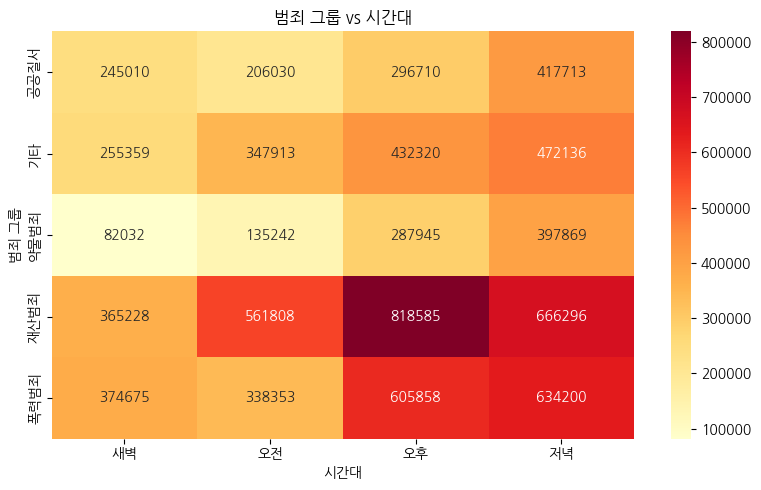

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.heatmap(ct_group, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Î≤îÏ£Ñ Í∑∏Î£π vs ÏãúÍ∞ÑÎåÄ')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('Î≤îÏ£Ñ Í∑∏Î£π')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Î≤îÏ£ÑÏú†ÌòïÏùÑ ÌïúÍ∏ÄÎ°ú Îß§Ìïë
df['Î≤îÏ£ÑÌïúÍ∏Ä'] = df['Primary Type'].map(type_translation).fillna('Í∏∞ÌÉÄ')

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
ct = pd.crosstab(df['Î≤îÏ£ÑÌïúÍ∏Ä'], df['Year'])

# Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(ct)
print("[Î≤îÏ£ÑÏú†Ìòï vs Ïó∞ÎèÑ] Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"ÏûêÏú†ÎèÑ: {dof}")

# Í≤∞Í≥º Ìï¥ÏÑù
alpha = 0.05
if p < alpha:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Ïó∞ÎèÑÏóê Îî∞Îùº Î≤îÏ£ÑÏú†ÌòïÏùò Î∂ÑÌè¨Îäî Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ")
else:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù: Ïó∞ÎèÑÏôÄ Î≤îÏ£ÑÏú†ÌòïÏùÄ ÎèÖÎ¶ΩÏ†Å (Í¥ÄÎ†® ÏóÜÏùå)")

[Î≤îÏ£ÑÏú†Ìòï vs Ïó∞ÎèÑ] Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 97781.78
p-value: 0.0000
ÏûêÏú†ÎèÑ: 528
‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Ïó∞ÎèÑÏóê Îî∞Îùº Î≤îÏ£ÑÏú†ÌòïÏùò Î∂ÑÌè¨Îäî Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ


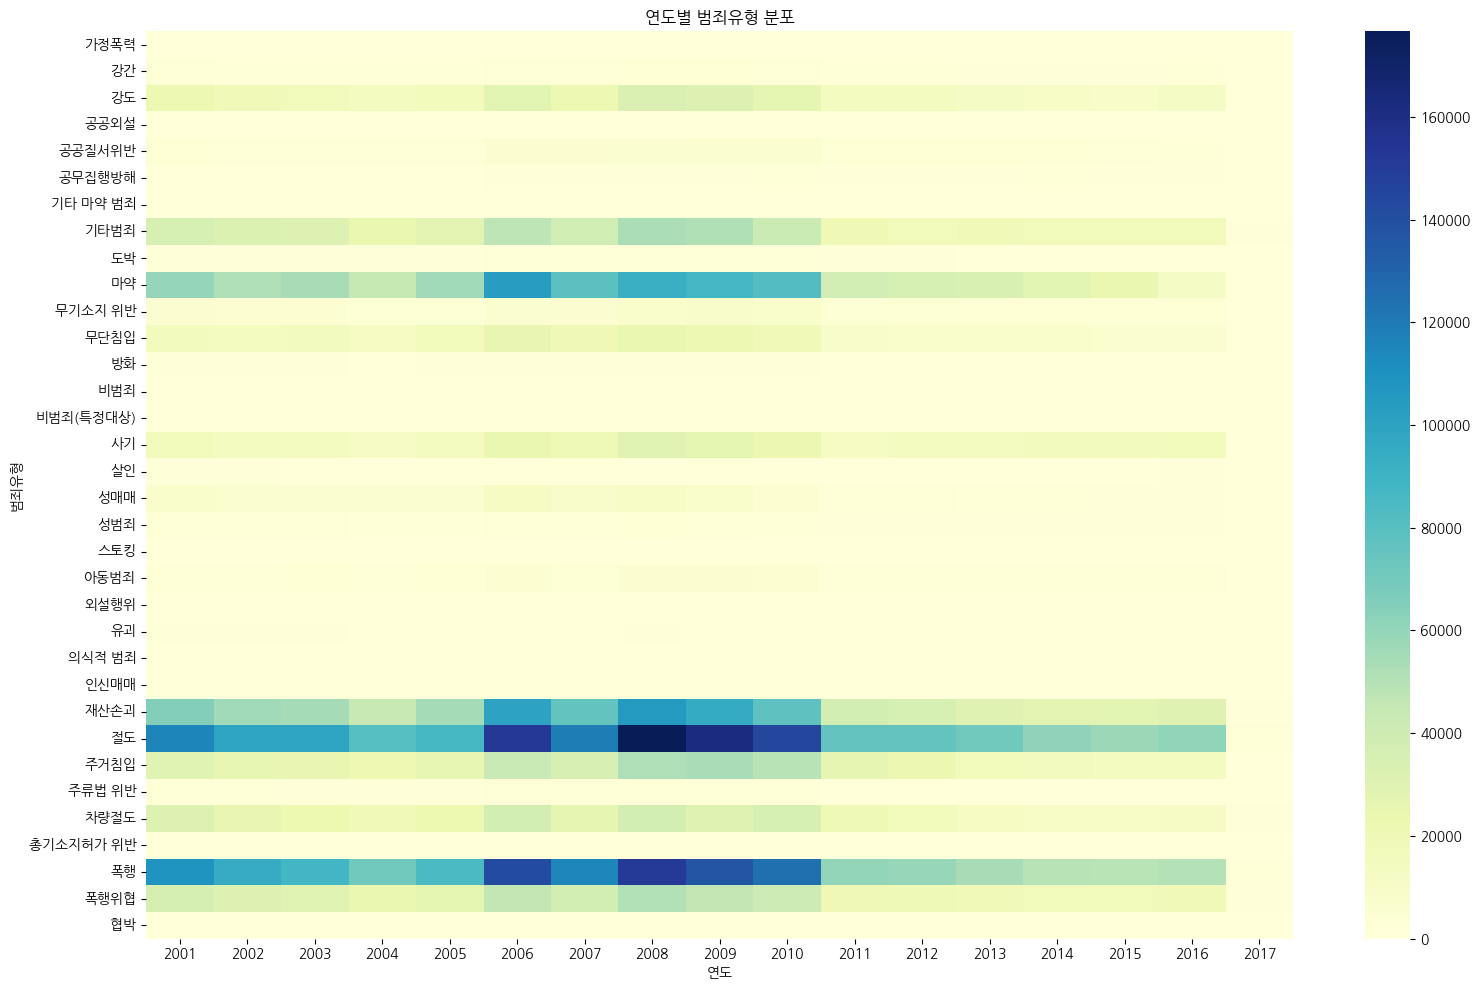

In [ ]:
#ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 10))
sns.heatmap(ct, cmap='YlGnBu')
plt.title('Ïó∞ÎèÑÎ≥Ñ Î≤îÏ£ÑÏú†Ìòï Î∂ÑÌè¨')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Î≤îÏ£ÑÏú†Ìòï')
plt.tight_layout()
plt.show()

In [ ]:
# ÎÇ†Ïßú ÌååÏã± ‚Üí Ïõî(month) Ï∂îÏ∂ú

df['Month'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.month

df['Î≤îÏ£ÑÌïúÍ∏Ä'] = df['Primary Type'].map(type_translation).fillna('Í∏∞ÌÉÄ')

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
ct_month = pd.crosstab(df['Î≤îÏ£ÑÌïúÍ∏Ä'], df['Month'])

# Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(ct_month)
print("[Î≤îÏ£ÑÏú†Ìòï vs Ïõî(Month)] Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"ÏûêÏú†ÎèÑ: {dof}")

# Ìï¥ÏÑù
alpha = 0.05
if p < alpha:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: ÏõîÎ≥ÑÎ°ú Î≤îÏ£ÑÏú†Ìòï Î∂ÑÌè¨Îäî Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ")
else:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù: ÏõîÍ≥º Î≤îÏ£ÑÏú†ÌòïÏùÄ ÎèÖÎ¶ΩÏ†Å (Í¥ÄÎ†® ÏóÜÏùå)")

[Î≤îÏ£ÑÏú†Ìòï vs Ïõî(Month)] Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 40239.19
p-value: 0.0000
ÏûêÏú†ÎèÑ: 363
‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: ÏõîÎ≥ÑÎ°ú Î≤îÏ£ÑÏú†Ìòï Î∂ÑÌè¨Îäî Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ


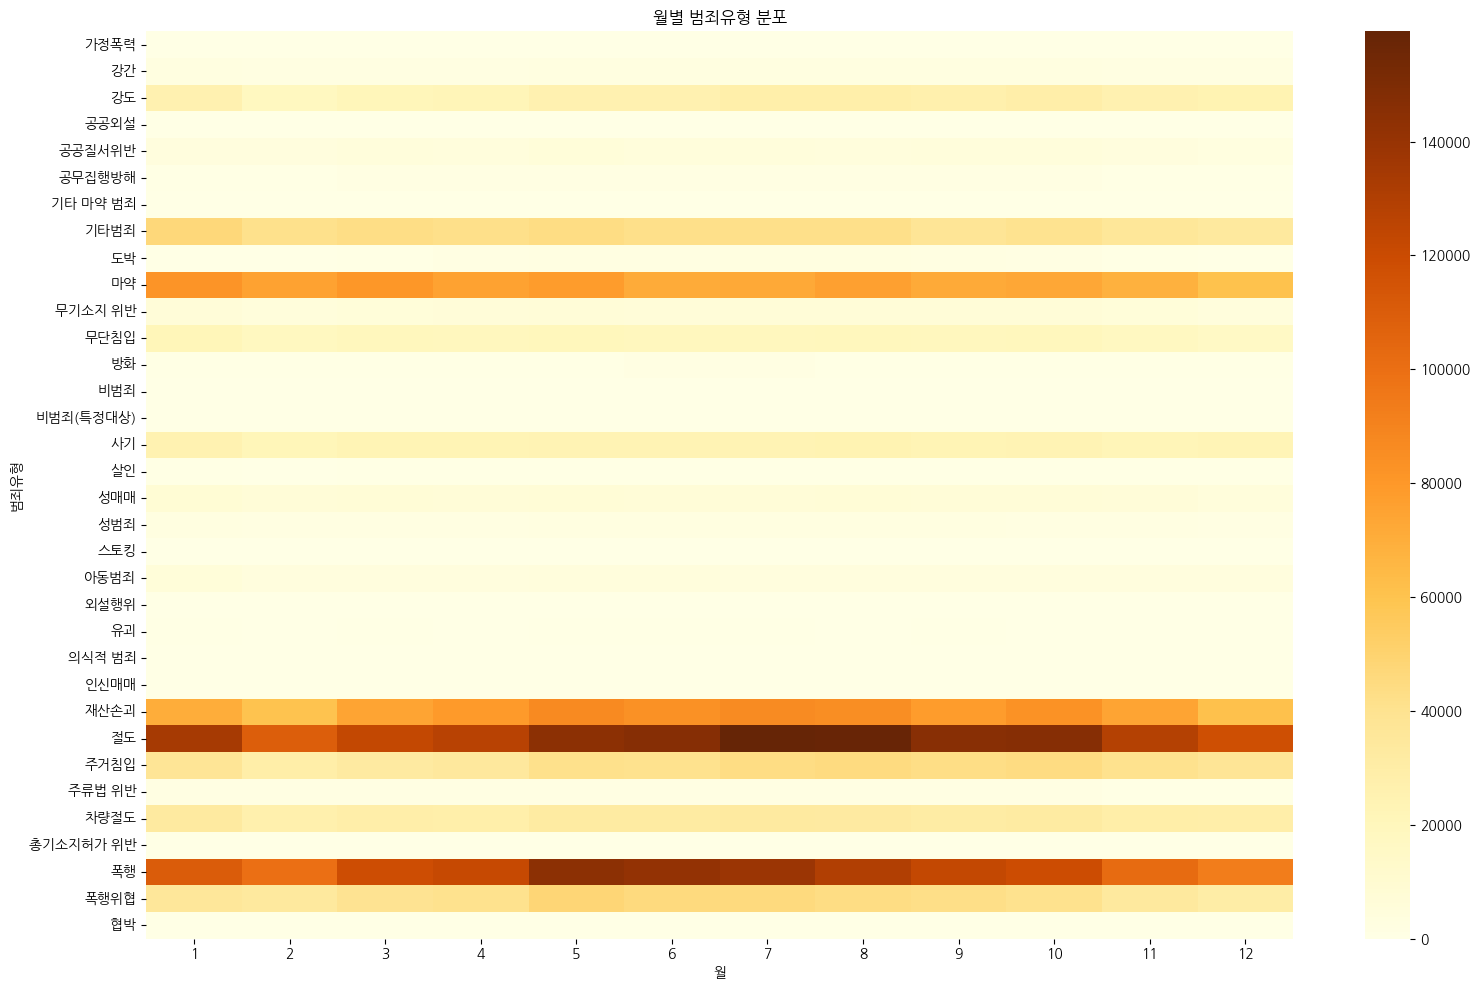

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 10))
sns.heatmap(ct_month, cmap='YlOrBr')
plt.title('ÏõîÎ≥Ñ Î≤îÏ£ÑÏú†Ìòï Î∂ÑÌè¨')
plt.xlabel('Ïõî')
plt.ylabel('Î≤îÏ£ÑÏú†Ìòï')
plt.tight_layout()
plt.show()

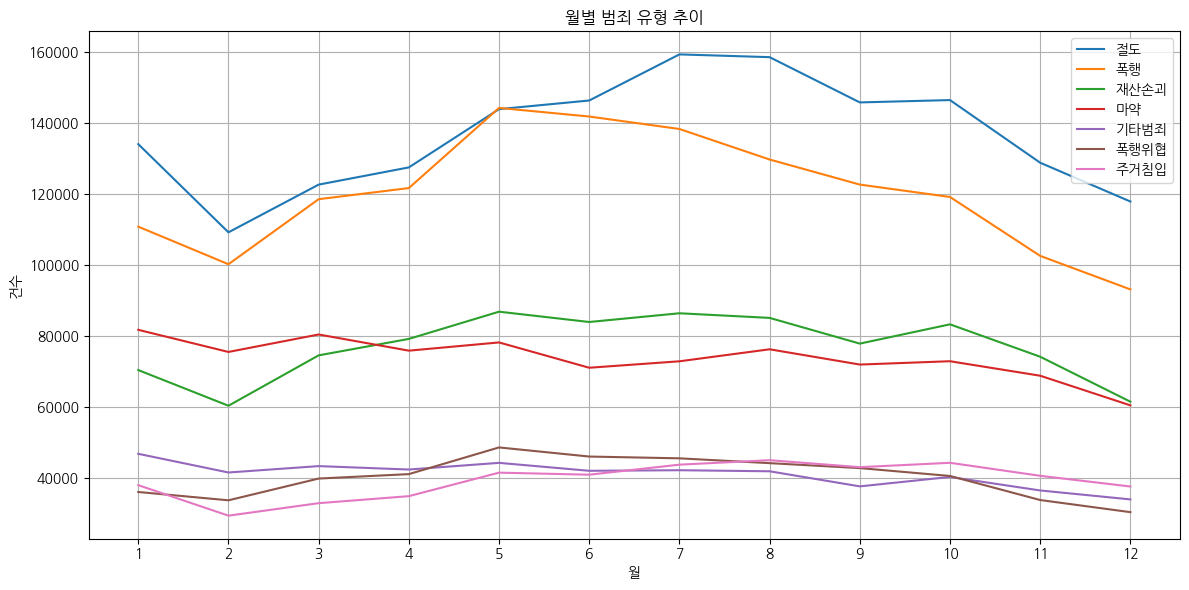

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÏõîÎ≥Ñ Î≤îÏ£ÑÏú†Ìòï Í±¥Ïàò ÏßëÍ≥Ñ
monthly_trend = df.groupby(['Month', 'Î≤îÏ£ÑÌïúÍ∏Ä']).size().reset_index(name='count')

# 2. ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôò ‚Üí xÏ∂ï: Ïõî / yÏ∂ï: Í±¥Ïàò / ÏÑ†: Î≤îÏ£ÑÏú†Ìòï
pivot = monthly_trend.pivot(index='Month', columns='Î≤îÏ£ÑÌïúÍ∏Ä', values='count').fillna(0)

# 3. ÎùºÏù∏Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ (Top Î≤îÏ£Ñ Ïú†Ìòï 5~7Í∞ú Ï∂îÎ†§ÏÑú Î≥¥Í∏∞ Ï¢ãÍ≤å)
top_crimes = df['Î≤îÏ£ÑÌïúÍ∏Ä'].value_counts().nlargest(7).index

plt.figure(figsize=(12, 6))
for crime in top_crimes:
    plt.plot(pivot.index, pivot[crime], label=crime)

plt.title('ÏõîÎ≥Ñ Î≤îÏ£Ñ Ïú†Ìòï Ï∂îÏù¥')
plt.xlabel('Ïõî')
plt.ylabel('Í±¥Ïàò')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [ ]:
# ÌååÏÉù Ïª¨Îüº ÏÉùÏÑ±
df['Hour'] = df['Date'].dt.hour             # ÏãúÍ∞Ñ
df['Weekday'] = df['Date'].dt.day_name()    # ÏöîÏùº (Ïòà: Monday)
df['Month'] = df['Date'].dt.month           # Ïõî (1~12)

In [ ]:
df = df.dropna(subset=['Hour', 'Weekday', 'Month'])

In [ ]:
print(df[['Date', 'Hour', 'Weekday', 'Month']].isna().sum())

Date       0
Hour       0
Weekday    0
Month      0
dtype: int64


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 2. ÎÇ†Ïßú(Date) ‚Üí datetimeÏúºÎ°ú Î≥ÄÌôò
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# 3. ÌååÏÉù Ïª¨Îüº ÏÉùÏÑ±
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()

# 4. Ï£ºÎßê/Ï£ºÏ§ë Íµ¨Î∂Ñ
df['Ï£ºÎßêÍµ¨Î∂Ñ'] = df['Weekday'].apply(lambda x: 'Ï£ºÎßê' if x in ['Saturday', 'Sunday'] else 'Ï£ºÏ§ë')

# 5. ÏöîÏùº-ÏãúÍ∞ÑÎåÄÎ≥Ñ Î≤îÏ£Ñ Î∞úÏÉù Ïàò ÏßëÍ≥Ñ
grouped = df.groupby(['Ï£ºÎßêÍµ¨Î∂Ñ', 'Hour']).size().reset_index(name='count')

# 6. Í≤∞Ï∏°Ïπò Ï†úÍ±∞
grouped = grouped.dropna()

# 7. Ïù¥Ïõê Î∂ÑÏÇ∞Î∂ÑÏÑù (Two-Way ANOVA)
model = smf.ols('count ~ C(Ï£ºÎßêÍµ¨Î∂Ñ) * C(Hour)', data=grouped).fit()

# 8. ANOVA Í≤∞Í≥ºÌëú Ï∂úÎ†•
anova_table = sm.stats.anova_lm(model, typ=2)
print("[Ïù¥Ïõê ANOVA] Ï£ºÎßê/Ï£ºÏ§ë √ó ÏãúÍ∞ÑÎåÄ")
print(anova_table)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


ValueError: array must not contain infs or NaNs

In [ ]:
import numpy as np

# NaN ÌôïÏù∏
print("NaN ÏûàÎäîÏßÄ ÌôïÏù∏:")
print(grouped.isna().sum())

# inf ÌôïÏù∏
print("\ninf ÏûàÎäîÏßÄ ÌôïÏù∏:")
print(np.isinf(grouped.select_dtypes(include=[float, int])).sum())

NaN ÏûàÎäîÏßÄ ÌôïÏù∏:
Ï£ºÎßêÍµ¨Î∂Ñ     0
Hour     0
count    0
dtype: int64

inf ÏûàÎäîÏßÄ ÌôïÏù∏:
Hour     0
count    0
dtype: int64


In [ ]:
# 1. Date Î≥ÄÌôò
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# 2. ÌååÏÉù Ïª¨Îüº
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()
df['Ï£ºÎßêÍµ¨Î∂Ñ'] = df['Weekday'].apply(lambda x: 'Ï£ºÎßê' if x in ['Saturday', 'Sunday'] else 'Ï£ºÏ§ë')

# 3. ÌïÑÏàò Ïª¨ÎüºÎßå Ïú†ÏßÄÌïòÍ≥† Í≤∞Ï∏° Ï†úÍ±∞
df_clean = df.dropna(subset=['Hour', 'Ï£ºÎßêÍµ¨Î∂Ñ'])

# 4. Í∑∏Î£πÎ≥Ñ count Í≥ÑÏÇ∞
grouped = df_clean.groupby(['Ï£ºÎßêÍµ¨Î∂Ñ', 'Hour']).size().reset_index(name='count')

# 5. Ï†ïÎ¶¨Îêú grouped ÌôïÏù∏
print(grouped.head())


  Ï£ºÎßêÍµ¨Î∂Ñ  Hour   count
0   Ï£ºÎßê     0  142821
1   Ï£ºÎßê     1  100859
2   Ï£ºÎßê     2   91243
3   Ï£ºÎßê     3   77760
4   Ï£ºÎßê     4   57153


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Ïù¥Ïõê ANOVA ÏàòÌñâ
model = smf.ols('count ~ C(Ï£ºÎßêÍµ¨Î∂Ñ) * C(Hour)', data=grouped).fit()

# ANOVA Í≤∞Í≥ºÌëú
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


ValueError: array must not contain infs or NaNs

In [ ]:
# 1. Date Î≥ÄÌôò Î∞è ÌååÏÉù
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()
df['Ï£ºÎßêÍµ¨Î∂Ñ'] = df['Weekday'].apply(lambda x: 'Ï£ºÎßê' if x in ['Saturday', 'Sunday'] else 'Ï£ºÏ§ë')

# 2. Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Ïó¥Îßå Ï†ïÎ¶¨
df_clean = df.dropna(subset=['Hour', 'Ï£ºÎßêÍµ¨Î∂Ñ'])

# 3. Ïù¥Ïõê ANOVA (ÏÇ¨Í±¥ ÌïòÎÇòÎãπ 1Ìñâ)
df_clean['Î∞úÏÉù'] = 1  # Í∞Å ÏÇ¨Í±¥ÏùÄ Î∞úÏÉù = 1

import statsmodels.formula.api as smf
import statsmodels.api as sm

# Ïù¥Ïõê Î∂ÑÏÇ∞Î∂ÑÏÑù ÏàòÌñâ
model = smf.ols('Î∞úÏÉù ~ C(Ï£ºÎßêÍµ¨Î∂Ñ) * C(Hour)', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


[Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï] ÏãúÍ∞Ñ(Hour) vs Ï£ºÎßê/Ï£ºÏ§ë
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 130759.03
p-value: 0.0000
ÏûêÏú†ÎèÑ: 23
‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: ÏãúÍ∞ÑÎåÄÏôÄ Ï£ºÏ§ë/Ï£ºÎßêÏùÄ Í¥ÄÎ†® ÏûàÏùå


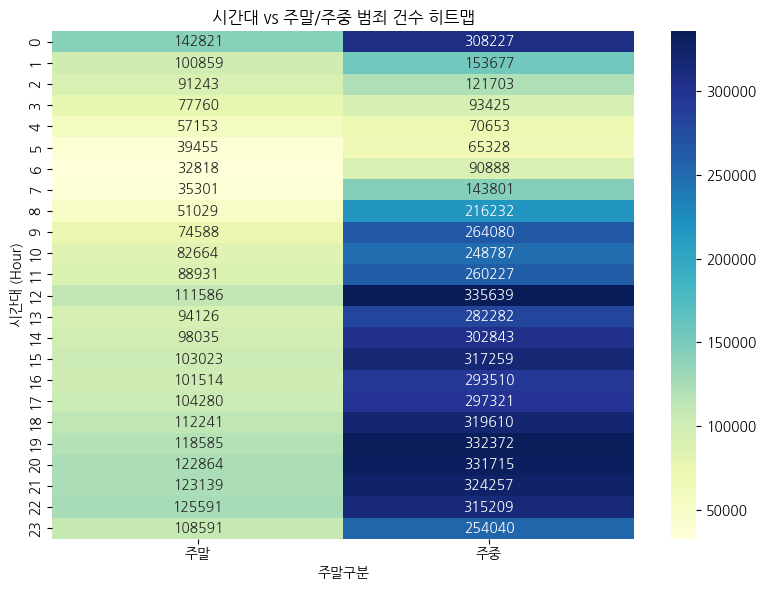

In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Date ÌååÏã± Î∞è ÌååÏÉù
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()
df['Ï£ºÎßêÍµ¨Î∂Ñ'] = df['Weekday'].apply(lambda x: 'Ï£ºÎßê' if x in ['Saturday', 'Sunday'] else 'Ï£ºÏ§ë')

# 2. ÍµêÏ∞®Ìëú ÏÉùÏÑ±
ct = pd.crosstab(df['Hour'], df['Ï£ºÎßêÍµ¨Î∂Ñ'])

# 3. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(ct)

# 4. Í≤∞Í≥º Ï∂úÎ†•
print("[Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï] ÏãúÍ∞Ñ(Hour) vs Ï£ºÎßê/Ï£ºÏ§ë")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"ÏûêÏú†ÎèÑ: {dof}")
if p < 0.05:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: ÏãúÍ∞ÑÎåÄÏôÄ Ï£ºÏ§ë/Ï£ºÎßêÏùÄ Í¥ÄÎ†® ÏûàÏùå")
else:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù: ÏãúÍ∞ÑÎåÄÏôÄ Ï£ºÏ§ë/Ï£ºÎßêÏùÄ ÎèÖÎ¶ΩÏ†ÅÏûÑ")

# 5. ÏãúÍ∞ÅÌôî (ÌûàÌä∏Îßµ)
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('ÏãúÍ∞ÑÎåÄ vs Ï£ºÎßê/Ï£ºÏ§ë Î≤îÏ£Ñ Í±¥Ïàò ÌûàÌä∏Îßµ')
plt.xlabel('Ï£ºÎßêÍµ¨Î∂Ñ')
plt.ylabel('ÏãúÍ∞ÑÎåÄ (Hour)')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# 1. ÌïúÍ∏Ä Îß§Ìïë Ï†ÅÏö©
df['Î≤îÏ£ÑÌïúÍ∏Ä'] = df['Primary Type'].map(type_translation).fillna('Í∏∞ÌÉÄ')

# 2. Í≤∞Ï∏°Í∞í Ï†úÍ±∞ (Arrest, Î≤îÏ£ÑÌïúÍ∏Ä Í∏∞Ï§Ä)
df_clean = df.dropna(subset=['Î≤îÏ£ÑÌïúÍ∏Ä', 'Arrest'])

# 3. ÍµêÏ∞®Ìëú ÏÉùÏÑ± (Î≤îÏ£ÑÏú†Ìòï vs Ï≤¥Ìè¨ Ïó¨Î∂Ä)
ct = pd.crosstab(df_clean['Î≤îÏ£ÑÌïúÍ∏Ä'], df_clean['Arrest'])

# 4. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(ct)

print("[Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï] Î≤îÏ£ÑÏú†Ìòï vs Ï≤¥Ìè¨ Ïó¨Î∂Ä")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"ÏûêÏú†ÎèÑ: {dof}")
if p < 0.05:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Î≤îÏ£ÑÏú†ÌòïÏóê Îî∞Îùº Ï≤¥Ìè¨ Ïó¨Î∂ÄÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Îã§Î¶Ñ")
else:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù: Î≤îÏ£ÑÏú†ÌòïÍ≥º Ï≤¥Ìè¨ Ïó¨Î∂ÄÎäî ÎèÖÎ¶ΩÏ†ÅÏûÑ")

[Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï] Î≤îÏ£ÑÏú†Ìòï vs Ï≤¥Ìè¨ Ïó¨Î∂Ä
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 3633946.90
p-value: 0.0000
ÏûêÏú†ÎèÑ: 33
‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Î≤îÏ£ÑÏú†ÌòïÏóê Îî∞Îùº Ï≤¥Ìè¨ Ïó¨Î∂ÄÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Îã§Î¶Ñ


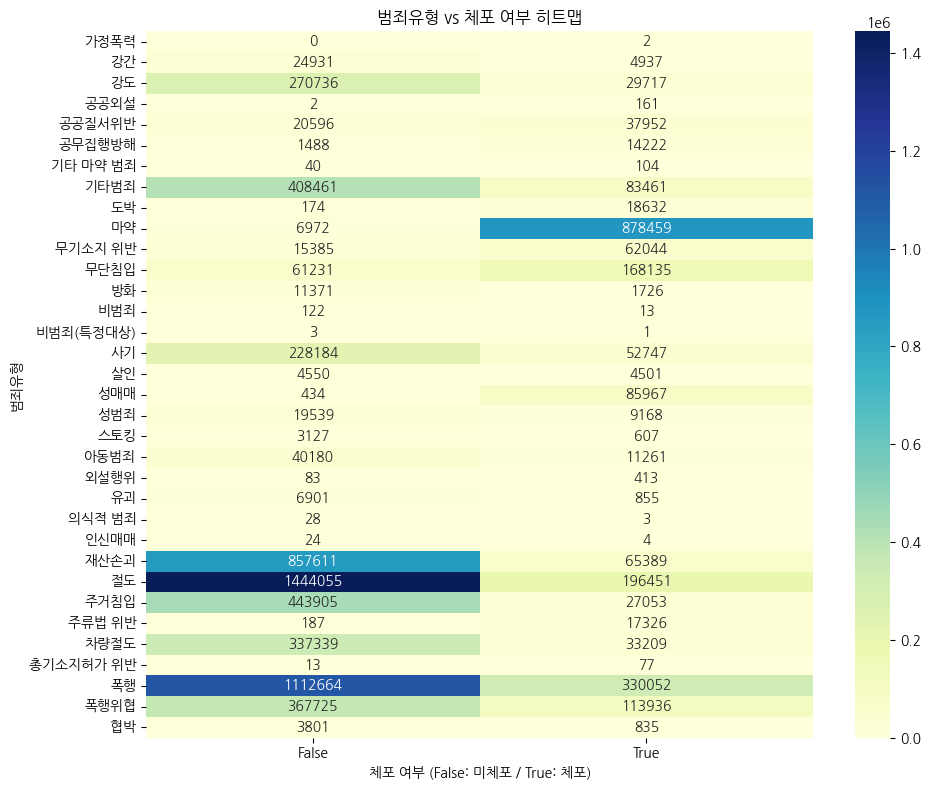

In [ ]:
# 4. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Î≤îÏ£ÑÏú†Ìòï vs Ï≤¥Ìè¨ Ïó¨Î∂Ä ÌûàÌä∏Îßµ')
plt.xlabel('Ï≤¥Ìè¨ Ïó¨Î∂Ä (False: ÎØ∏Ï≤¥Ìè¨ / True: Ï≤¥Ìè¨)')
plt.ylabel('Î≤îÏ£ÑÏú†Ìòï')
plt.tight_layout()
plt.show()

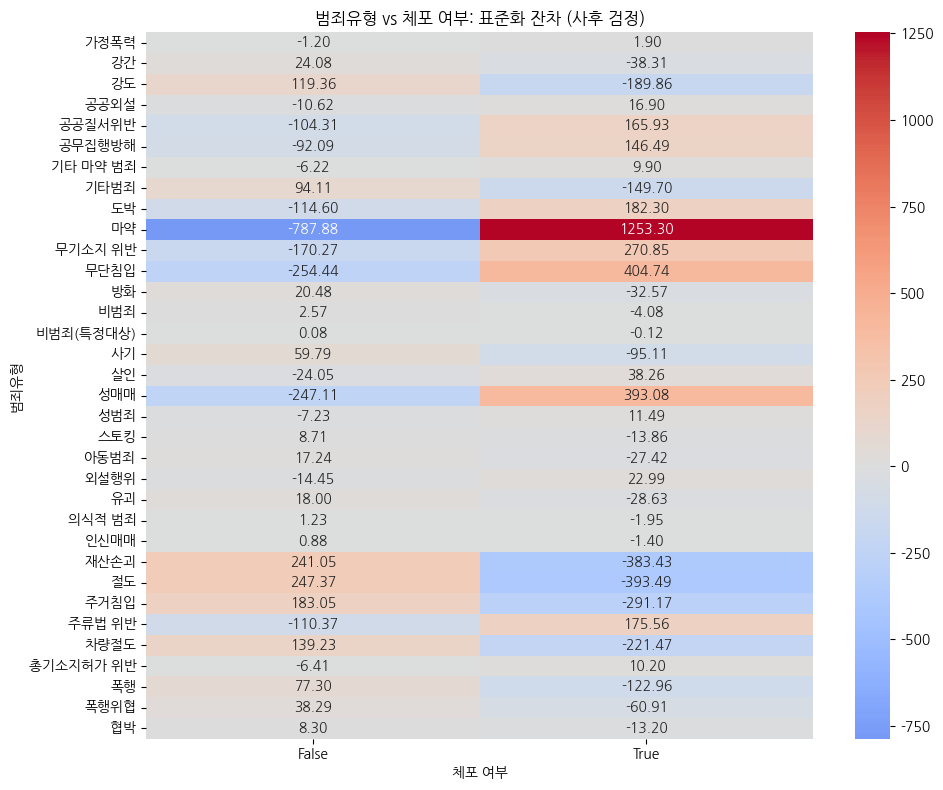

In [ ]:
import numpy as np

# 1. ÍµêÏ∞®Ìëú (Ïù¥ÎØ∏ ÏÉùÏÑ±Îê®)
ct = pd.crosstab(df_clean['Î≤îÏ£ÑÌïúÍ∏Ä'], df_clean['Arrest'])

# 2. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï (Í∏∞ÎåÄÍ∞í Í≥ÑÏÇ∞ Ìè¨Ìï®)
chi2, p, dof, expected = chi2_contingency(ct)

# 3. ÌëúÏ§ÄÌôî ÏûîÏ∞® Í≥ÑÏÇ∞
residuals = (ct - expected) / np.sqrt(expected)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(residuals, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Î≤îÏ£ÑÏú†Ìòï vs Ï≤¥Ìè¨ Ïó¨Î∂Ä: ÌëúÏ§ÄÌôî ÏûîÏ∞® (ÏÇ¨ÌõÑ Í≤ÄÏ†ï)')
plt.xlabel('Ï≤¥Ìè¨ Ïó¨Î∂Ä')
plt.ylabel('Î≤îÏ£ÑÏú†Ìòï')
plt.tight_layout()
plt.show()


# Î≤îÏ£ÑÏú†ÌòïÍ≥º Disctrict Í∞ÑÏùò Í¥ÄÎ†®ÏÑ± - Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï

In [ ]:
# 10. ÍµêÏ∞®Ìëú ÏÉùÏÑ±
ct2 = pd.crosstab(df['Primary Type'], df['District'])

# 11. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(ct2)
print("\n[Primary Type vs ÏßÄÏó≠]")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2_2:.2f}, p-value: {p_2:.4f}, ÏûêÏú†ÎèÑ: {dof_2}")

# 12. Í∞ÄÏÑ§ Í≤ÄÏ†ï
if p_2 < alpha:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Î≤îÏ£Ñ Ïú†ÌòïÍ≥º ÏßÄÏó≠ÏùÄ Í¥ÄÎ†® ÏûàÏùå")
else:
    print("‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù: Î≤îÏ£Ñ Ïú†ÌòïÍ≥º ÏßÄÏó≠ÏùÄ Í¥ÄÎ†® ÏóÜÏùå")


[Primary Type vs ÏßÄÏó≠]
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 983797.87, p-value: 0.0000, ÏûêÏú†ÎèÑ: 850
‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Î≤îÏ£Ñ Ïú†ÌòïÍ≥º ÏßÄÏó≠ÏùÄ Í¥ÄÎ†® ÏûàÏùå


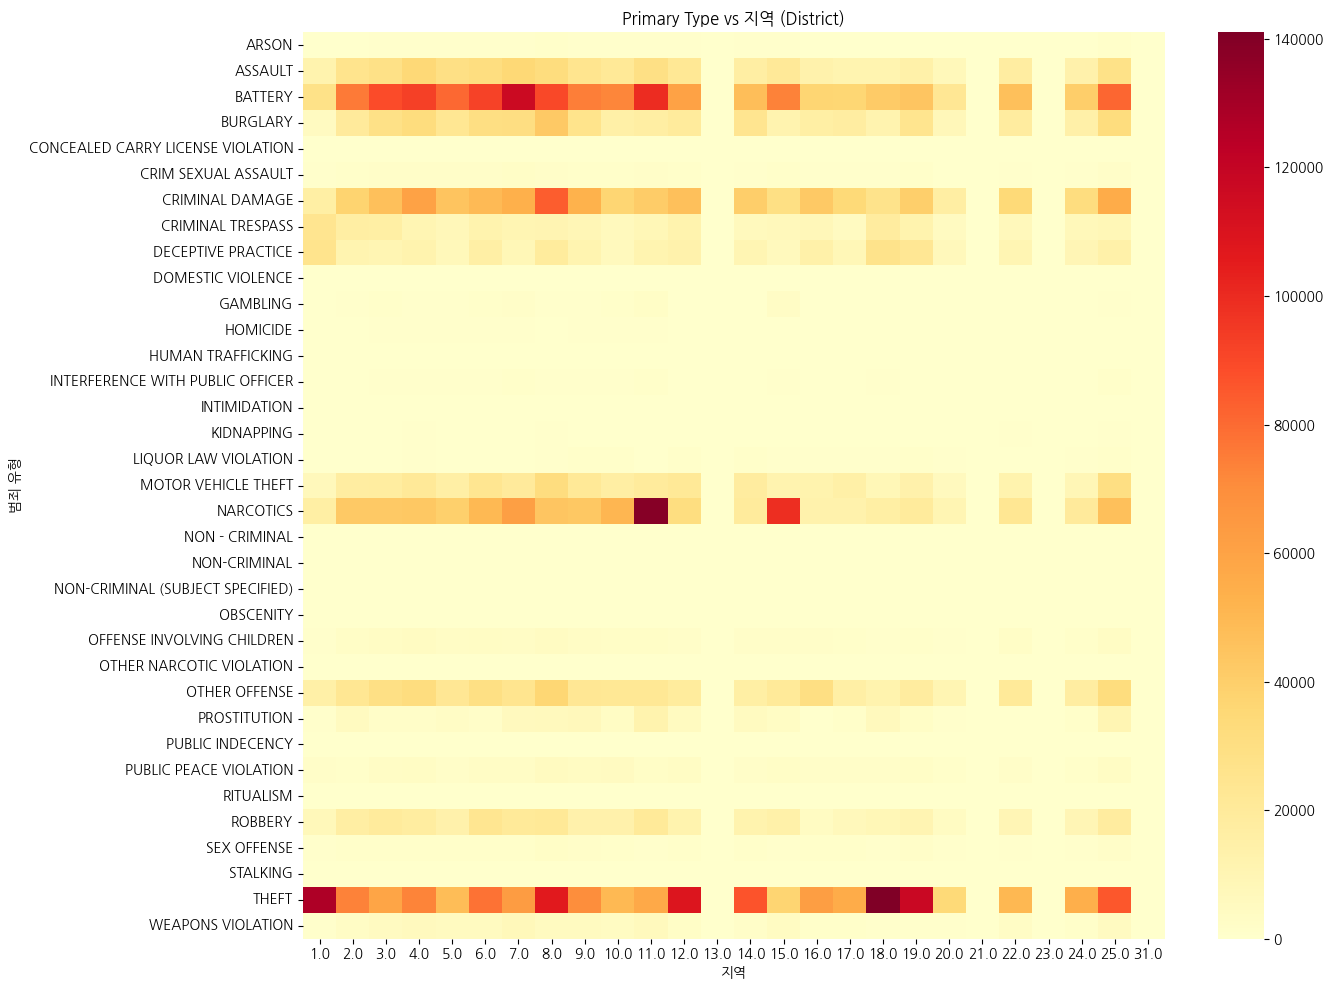

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 10))
sns.heatmap(ct2, cmap='YlOrRd', cbar=True)
plt.title('Primary Type vs ÏßÄÏó≠ (District)')
plt.xlabel('ÏßÄÏó≠')
plt.ylabel('Î≤îÏ£Ñ Ïú†Ìòï')
plt.tight_layout()
plt.show()

# Primary TypeÍ≥º Ï≤¥Ìè¨ Ïó¨Î∂Ä Í∞Ñ Í¥ÄÎ†®ÏÑ± ‚Äî Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï

In [ ]:
# ÍµêÏ∞®Ìëú
cross_tab_arrest = pd.crosstab(df_top['Primary Type'], df_top['Arrest'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(cross_tab_arrest)
print("p-value:", p)
if p < 0.05:
    print("‚Üí Î≤îÏ£Ñ Ïú†ÌòïÍ≥º Ï≤¥Ìè¨ Ïó¨Î∂Ä ÏÇ¨Ïù¥Ïóê Ïú†ÏùòÎØ∏Ìïú Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏùå")
else:
    print("‚Üí Í¥ÄÎ†®ÏÑ± ÏóÜÏùå")

p-value: 0.0
‚Üí Î≤îÏ£Ñ Ïú†ÌòïÍ≥º Ï≤¥Ìè¨ Ïó¨Î∂Ä ÏÇ¨Ïù¥Ïóê Ïú†ÏùòÎØ∏Ìïú Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏùå


# ÏßÄÏó≠(District)Î≥Ñ Î≤îÏ£Ñ Ïú†Ìòï Î∂ÑÌè¨ ‚Äî Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï

In [ ]:
# ÏÉÅÏúÑ 5Í∞ú Ïú†Ìòï, District Í≤∞Ï∏° Ï†úÍ±∞
df_geo = df_top.dropna(subset=['District'])

# ÍµêÏ∞®Ìëú
cross_tab_district = pd.crosstab(df_geo['District'], df_geo['Primary Type'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(cross_tab_district)
print("p-value:", p)
if p < 0.05:
    print("‚Üí ÏßÄÏó≠Ïóê Îî∞Îùº Î≤îÏ£Ñ Ïú†Ìòï Î∂ÑÌè¨Í∞Ä Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ")
else:
    print("‚Üí ÏßÄÏó≠Ïóê Îî∞Î•∏ Ï∞®Ïù¥ ÏóÜÏùå")

p-value: 0.0
‚Üí ÏßÄÏó≠Ïóê Îî∞Îùº Î≤îÏ£Ñ Ïú†Ìòï Î∂ÑÌè¨Í∞Ä Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ


# ÍµêÏ∞®Ìëú ÏãúÍ∞ÅÌôî

In [ ]:
# ÌïúÍ∏ÄÌôî
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 62.3 MB/s eta 0:00:00


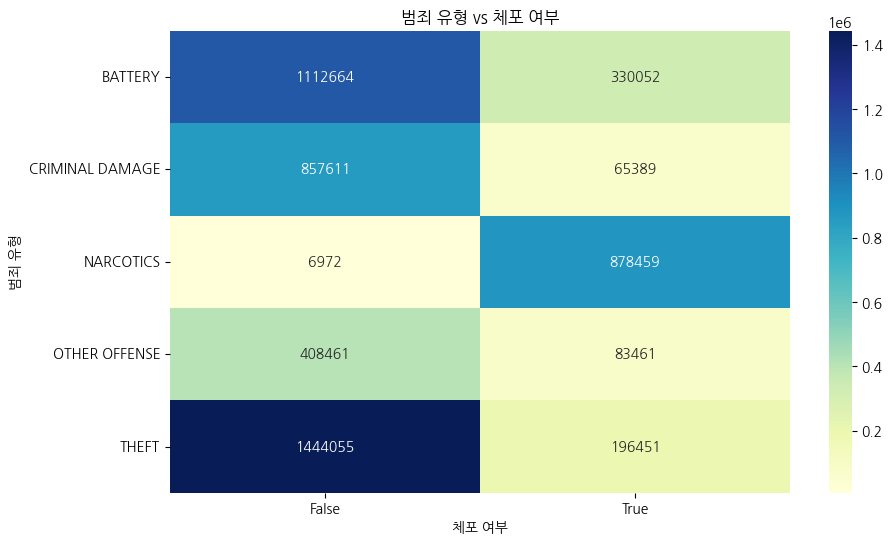

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_arrest, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Î≤îÏ£Ñ Ïú†Ìòï vs Ï≤¥Ìè¨ Ïó¨Î∂Ä")
plt.ylabel("Î≤îÏ£Ñ Ïú†Ìòï")
plt.xlabel("Ï≤¥Ìè¨ Ïó¨Î∂Ä")
plt.show()

# Ìë∏ÏïÑÏÜ° Î∂ÑÌè¨: ÌïòÎ£® Îã®ÏúÑ ÏÇ¨Í±¥ Ïàò Î∂ÑÏÑù
Î™©Ìëú:
 - ÌïòÎ£® Îã®ÏúÑ ÏÇ¨Í±¥ ÏàòÎ•º ÏßëÍ≥ÑÌïòÍ≥†, ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ ÌôïÏù∏ÌïòÏó¨ Ìë∏ÏïÑÏÜ° Î∂ÑÌè¨ Í∞ÄÏ†ï(ÌèâÍ∑†‚âàÎ∂ÑÏÇ∞)ÏùÑ Í≤ÄÏ¶ù
 - Ïù¥ Í∞íÏùÑ Í∏∞Î∞òÏúºÎ°ú Poisson Î™®Îç∏ÏùÑ ÌôúÏö©Ìïú ÏòàÏ∏° Í∞ÄÎä•ÏÑ± ÌèâÍ∞Ä

ÌïòÎ£® ÌèâÍ∑† ÏÇ¨Í±¥ Ïàò: 1354.7052200614125
ÌïòÎ£® ÏÇ¨Í±¥ Î∂ÑÏÇ∞: 381356.5140113068


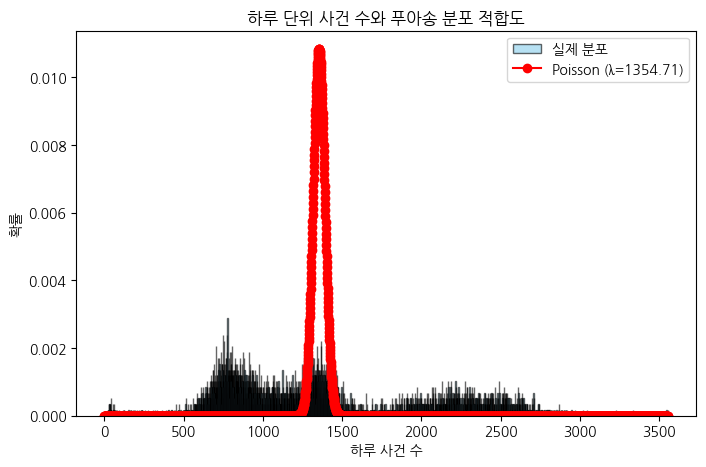

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# ÎÇ†ÏßúÎßå Ï∂îÏ∂úÌïòÏó¨ ÏßëÍ≥Ñ (ÌïòÎ£® Îã®ÏúÑ ÏÇ¨Í±¥ Ïàò)
df['Date_only'] = df['Date'].dt.date
daily_counts = df.groupby('Date_only').size()

# ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ ÌôïÏù∏
mean_count = daily_counts.mean()
var_count = daily_counts.var()
print("ÌïòÎ£® ÌèâÍ∑† ÏÇ¨Í±¥ Ïàò:", mean_count)
print("ÌïòÎ£® ÏÇ¨Í±¥ Î∂ÑÏÇ∞:", var_count)

# ÌûàÏä§ÌÜ†Í∑∏Îû®Í≥º Ïù¥Î°†Ï†Å Ìë∏ÏïÑÏÜ° Î∂ÑÌè¨ Ïò§Î≤ÑÎ†àÏù¥
x = np.arange(0, daily_counts.max() + 1)
poisson_pmf = poisson.pmf(x, mu=mean_count)

plt.figure(figsize=(8, 5))
plt.hist(daily_counts, bins=range(0, daily_counts.max() + 2), density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Ïã§Ï†ú Î∂ÑÌè¨')
plt.plot(x, poisson_pmf, 'ro-', label=f'Poisson (Œª={mean_count:.2f})')
plt.xlabel("ÌïòÎ£® ÏÇ¨Í±¥ Ïàò")
plt.ylabel("ÌôïÎ•†")
plt.title("ÌïòÎ£® Îã®ÏúÑ ÏÇ¨Í±¥ ÏàòÏôÄ Ìë∏ÏïÑÏÜ° Î∂ÑÌè¨ Ï†ÅÌï©ÎèÑ")
plt.legend()
plt.show()


### Îç∞Ïù¥ÌÑ∞Í∞Ä Ìè¨ÏïÑÏÜ°Î∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.

# ÏßÄÏàò Î∂ÑÌè¨: ÏÇ¨Í±¥ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤© Î∂ÑÏÑù
 Î™©Ìëú:

- ÏÇ¨Í±¥Ïù¥ Î∞úÏÉùÌïú ÏãúÏ†ê ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìïú ÌõÑ, Ïù∏Ï†ë ÏÇ¨Í±¥ Í∞Ñ ÏãúÍ∞Ñ Ï∞®Ïù¥Î•º Íµ¨Ìï¥ÏÑú ÌûàÏä§ÌÜ†Í∑∏Îû®Í≥º Ïª§ÎÑê Î∞ÄÎèÑ Ï∂îÏ†ïÏùÑ ÌÜµÌï¥ ÏßÄÏàò Î∂ÑÌè¨ ÌòïÌÉúÎ•º ÌôïÏù∏

- ÎßåÏïΩ ÏÇ¨Í±¥Ïù¥ ÎûúÎç§ÌïòÍ≤å Î∞úÏÉùÌïúÎã§Î©¥, ÏãúÍ∞Ñ Í∞ÑÍ≤©Ïù¥ ÏßÄÏàò Î∂ÑÌè¨Ïóê Í∞ÄÍπåÏö∏ Í≤ÉÏúºÎ°ú ÏòàÏÉÅ

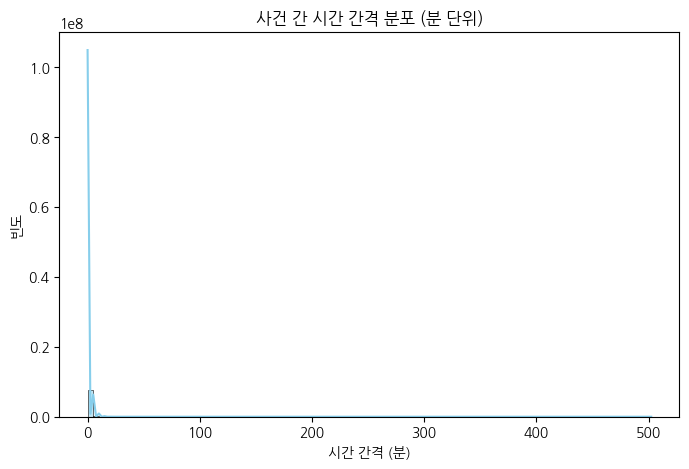

In [ ]:
import seaborn as sns

#ÏãúÍ∞Ñ Ï†ïÎ†¨ Î∞è ÏãúÍ∞Ñ Ï∞® Í≥ÑÏÇ∞ (Î∂Ñ Îã®ÏúÑ)
df_sorted = df.sort_values(by="Date")
df_sorted["Time_Diff_Min"] = df_sorted["Date"].diff().dt.total_seconds() / 60  # Î∂Ñ Îã®ÏúÑ

# Í≤∞Ï∏° Ï†úÍ±∞
time_gaps = df_sorted["Time_Diff_Min"].dropna()
time_gaps = time_gaps[time_gaps < 1000]  # Í∑πÎã®Í∞í Ï†úÏô∏ÌïòÎ©¥ Î∂ÑÌè¨ ÌôïÏù∏Ïù¥ Îçî ÏûòÎê®

# ÏßÄÏàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.histplot(time_gaps, bins=100, kde=True, color='skyblue')
plt.title("ÏÇ¨Í±¥ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤© Î∂ÑÌè¨ (Î∂Ñ Îã®ÏúÑ)")
plt.xlabel("ÏãúÍ∞Ñ Í∞ÑÍ≤© (Î∂Ñ)")
plt.ylabel("ÎπàÎèÑ")
plt.show()

# Î≤†Ïù¥Î∂à Î∂ÑÌè¨: ÏÇ¨Í±¥ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤©Ïóê ÎåÄÌïú Î≤†Ïù¥Î∂à Ï†ÅÌï©
Î™©Ìëú:

- ÏÇ¨Í±¥ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤© Îç∞Ïù¥ÌÑ∞Ïóê Î≤†Ïù¥Î∂à Î∂ÑÌè¨Î•º Ï†ÅÌï©ÏãúÌÇ§Í≥†,
- Ï†ÅÌï©Îêú ÌååÎùºÎØ∏ÌÑ∞(ÌäπÌûà shape ÌååÎùºÎØ∏ÌÑ∞
ùëò)Î•º ÌÜµÌï¥ ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ†ÏàòÎ°ù Î∞úÏÉùÎ•†Ïù¥ Ï¶ùÍ∞ÄÌïòÎäîÏßÄ(ùëò>1), Í∞êÏÜåÌïòÎäîÏßÄ(ùëò<1)Î•º ÌôïÏù∏

Î≤†Ïù¥Î∂à Î∂ÑÌè¨ Ï†ÅÌï© ÌååÎùºÎØ∏ÌÑ∞ (shape, loc, scale): 0.08969123973097218 0 6.132842814690058e-18


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:2581: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


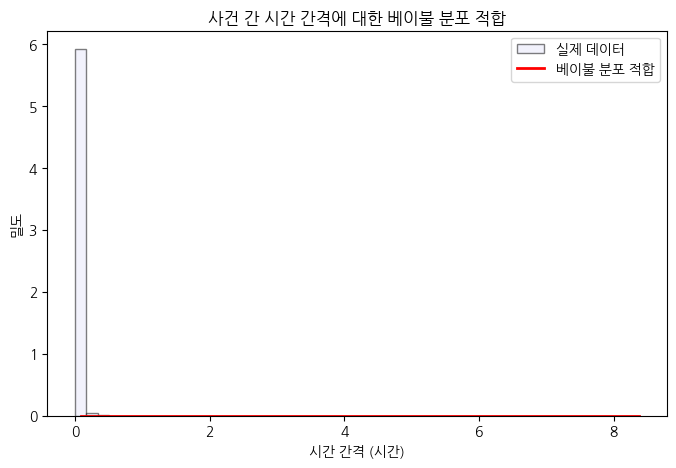

In [ ]:
from scipy.stats import weibull_min

# Î≤†Ïù¥Î∂à Î∂ÑÌè¨ Ï†ÅÌï© (ÏúÑÏπò(loc)Î•º 0ÏúºÎ°ú Í≥†Ï†ï)
time_gaps = time_diffs.values
c, loc, scale = weibull_min.fit(time_gaps, floc=0)
print("Î≤†Ïù¥Î∂à Î∂ÑÌè¨ Ï†ÅÌï© ÌååÎùºÎØ∏ÌÑ∞ (shape, loc, scale):", c, loc, scale)

# x Î≤îÏúÑ ÏÑ§Ï†ï Î∞è Î≤†Ïù¥Î∂à Î∂ÑÌè¨ PDF Í≥ÑÏÇ∞
x = np.linspace(0, time_gaps.max(), 100)
weibull_pdf = weibull_min.pdf(x, c, loc, scale)

plt.figure(figsize=(8, 5))
plt.hist(time_gaps, bins=50, density=True, alpha=0.5, color='lavender', edgecolor='black', label='Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞')
plt.plot(x, weibull_pdf, 'r-', lw=2, label='Î≤†Ïù¥Î∂à Î∂ÑÌè¨ Ï†ÅÌï©')
plt.xlabel("ÏãúÍ∞Ñ Í∞ÑÍ≤© (ÏãúÍ∞Ñ)")
plt.ylabel("Î∞ÄÎèÑ")
plt.title("ÏÇ¨Í±¥ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤©Ïóê ÎåÄÌïú Î≤†Ïù¥Î∂à Î∂ÑÌè¨ Ï†ÅÌï©")
plt.legend()
plt.show()

# Ï†àÎèÑ ÏÇ¨Í±¥Îßå Ï∂îÏ∂úÌïòÏó¨ Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨ ÌôïÏù∏

In [ ]:
# Ï†àÎèÑ(THEFT) ÏÇ¨Í±¥Îßå ÌïÑÌÑ∞ÎßÅ
df_theft = df[df["Primary Type"] == "THEFT"]

# ÎÇ†ÏßúÎßå Ï∂îÏ∂úÌï¥ÏÑú ÏùºÎ≥Ñ ÏÇ¨Í±¥ Ïàò ÏßëÍ≥Ñ
df_theft["Date_only"] = df_theft["Date"].dt.date
daily_theft_counts = df_theft.groupby("Date_only").size()

# ÌèâÍ∑†, Î∂ÑÏÇ∞ ÌôïÏù∏
lambda_theft = daily_theft_counts.mean()
variance_theft = daily_theft_counts.var()
print("Ï†àÎèÑ ÌïòÎ£® ÌèâÍ∑† ÏÇ¨Í±¥ Ïàò (Œª):", lambda_theft)
print("Ï†àÎèÑ ÌïòÎ£® ÏÇ¨Í±¥ Ïàò Î∂ÑÏÇ∞:", variance_theft)

Ï†àÎèÑ ÌïòÎ£® ÌèâÍ∑† ÏÇ¨Í±¥ Ïàò (Œª): 279.85431593312865
Ï†àÎèÑ ÌïòÎ£® ÏÇ¨Í±¥ Ïàò Î∂ÑÏÇ∞: 15558.467426344776


<ipython-input-18-219d44213d41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theft["Date_only"] = df_theft["Date"].dt.date


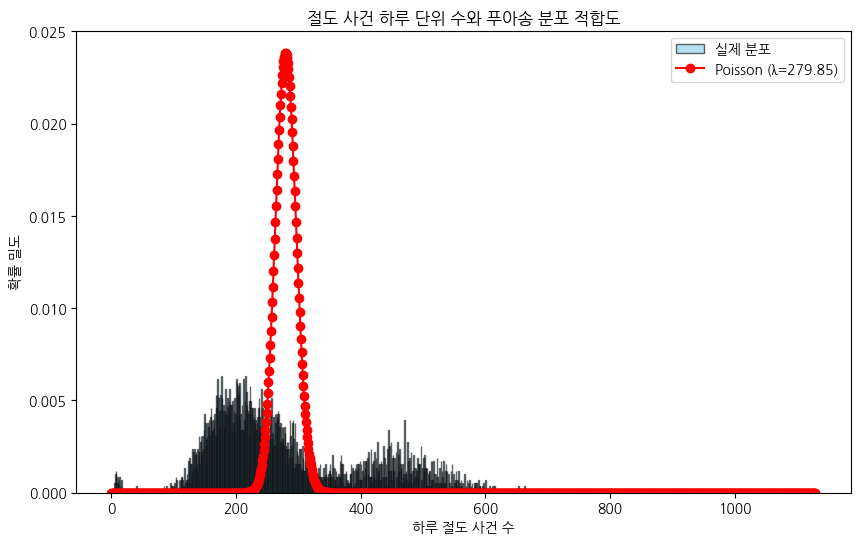

In [ ]:
from scipy.stats import poisson

# Ïù¥Î°†Ï†Å Ìë∏ÏïÑÏÜ° Î∂ÑÌè¨ ÎßåÎì§Í∏∞
x = np.arange(0, daily_theft_counts.max() + 1)
poisson_pmf = poisson.pmf(x, mu=lambda_theft)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.hist(daily_theft_counts, bins=range(0, daily_theft_counts.max() + 2),
         density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Ïã§Ï†ú Î∂ÑÌè¨")
plt.plot(x, poisson_pmf, 'ro-', label=f'Poisson (Œª={lambda_theft:.2f})')
plt.xlabel("ÌïòÎ£® Ï†àÎèÑ ÏÇ¨Í±¥ Ïàò")
plt.ylabel("ÌôïÎ•† Î∞ÄÎèÑ")
plt.title("Ï†àÎèÑ ÏÇ¨Í±¥ ÌïòÎ£® Îã®ÏúÑ ÏàòÏôÄ Ìë∏ÏïÑÏÜ° Î∂ÑÌè¨ Ï†ÅÌï©ÎèÑ")
plt.legend()
plt.show()

In [ ]:
# Ï†àÎèÑ ÏÇ¨Í±¥Îßå ÌïÑÌÑ∞ÎßÅ
df_theft = df[df["Primary Type"] == "THEFT"]

# ÏãúÍ∞ÑÏàú Ï†ïÎ†¨
df_theft_sorted = df_theft.sort_values(by="Date")

# ÏÇ¨Í±¥ Í∞Ñ ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Î∂Ñ Îã®ÏúÑÎ°ú)
df_theft_sorted["Time_Diff_Min"] = df_theft_sorted["Date"].diff().dt.total_seconds() / 60

# Ï≤´ ÌñâÏùÄ NaNÏù¥ÎØÄÎ°ú Ï†úÏô∏ÌïòÍ≥† ÌèâÍ∑† Í≥ÑÏÇ∞
mean_diff = df_theft_sorted["Time_Diff_Min"].dropna().mean()
print(f"Ï†àÎèÑ ÏÇ¨Í±¥ Í∞Ñ ÌèâÍ∑† ÏãúÍ∞Ñ Í∞ÑÍ≤©: {mean_diff:.2f}Î∂Ñ")

Ï†àÎèÑ ÏÇ¨Í±¥ Í∞Ñ ÌèâÍ∑† ÏãúÍ∞Ñ Í∞ÑÍ≤©: 5.15Î∂Ñ


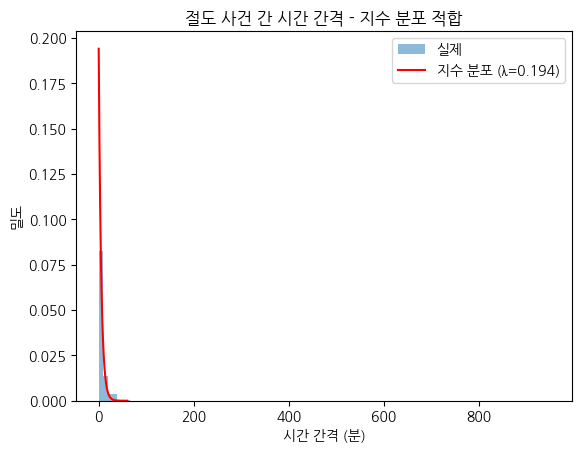

In [ ]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 60, 200)
lambda_hat = 1 / 5.15
pdf = expon.pdf(x, scale=1/lambda_hat)

plt.hist(df_theft_sorted["Time_Diff_Min"].dropna(), bins=100, density=True, alpha=0.5, label="Ïã§Ï†ú")
plt.plot(x, pdf, 'r-', label=f"ÏßÄÏàò Î∂ÑÌè¨ (Œª={lambda_hat:.3f})")
plt.xlabel("ÏãúÍ∞Ñ Í∞ÑÍ≤© (Î∂Ñ)")
plt.ylabel("Î∞ÄÎèÑ")
plt.title("Ï†àÎèÑ ÏÇ¨Í±¥ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤© - ÏßÄÏàò Î∂ÑÌè¨ Ï†ÅÌï©")
plt.legend()
plt.show()

Î≤†Ïù¥Î∂à Î∂ÑÌè¨ ÌååÎùºÎØ∏ÌÑ∞: shape(k)=0.036, scale=0.00


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:2581: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


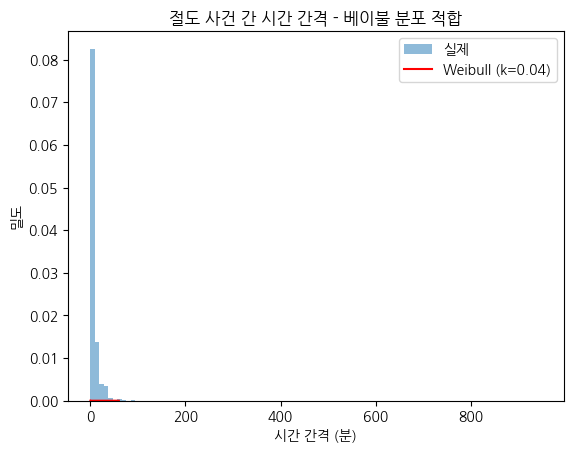

In [ ]:
from scipy.stats import weibull_min

time_gaps = df_theft_sorted["Time_Diff_Min"].dropna()
c, loc, scale = weibull_min.fit(time_gaps, floc=0)
print(f"Î≤†Ïù¥Î∂à Î∂ÑÌè¨ ÌååÎùºÎØ∏ÌÑ∞: shape(k)={c:.3f}, scale={scale:.2f}")

x = np.linspace(0, 60, 200)
pdf = weibull_min.pdf(x, c, loc, scale)

plt.hist(time_gaps, bins=100, density=True, alpha=0.5, label="Ïã§Ï†ú")
plt.plot(x, pdf, 'r-', label=f"Weibull (k={c:.2f})")
plt.xlabel("ÏãúÍ∞Ñ Í∞ÑÍ≤© (Î∂Ñ)")
plt.ylabel("Î∞ÄÎèÑ")
plt.title("Ï†àÎèÑ ÏÇ¨Í±¥ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤© - Î≤†Ïù¥Î∂à Î∂ÑÌè¨ Ï†ÅÌï©")
plt.legend()
plt.show()


In [ ]:
# Ï†àÎèÑ ÏÇ¨Í±¥Îßå Ï∂îÏ∂ú + District Í≤∞Ï∏° Ï†úÍ±∞
df_theft = df[df["Primary Type"] == "THEFT"].dropna(subset=["District"])

# DistrictÎ•º intÎ°ú Ï†ïÎ¶¨ (ÌòπÏãú floatÏù¥Î©¥)
df_theft["District"] = df_theft["District"].astype(int)

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
district_gaps = []

# Í∞Å DistrictÎßàÎã§ Î∞òÎ≥µ
for district, group in df_theft.groupby("District"):
    group_sorted = group.sort_values(by="Date")
    time_diff = group_sorted["Date"].diff().dt.total_seconds() / 60  # Î∂Ñ Îã®ÏúÑ
    mean_gap = time_diff.dropna().mean()
    district_gaps.append((district, mean_gap))

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
gap_df = pd.DataFrame(district_gaps, columns=["District", "Mean_Gap_Min"]).sort_values("Mean_Gap_Min")

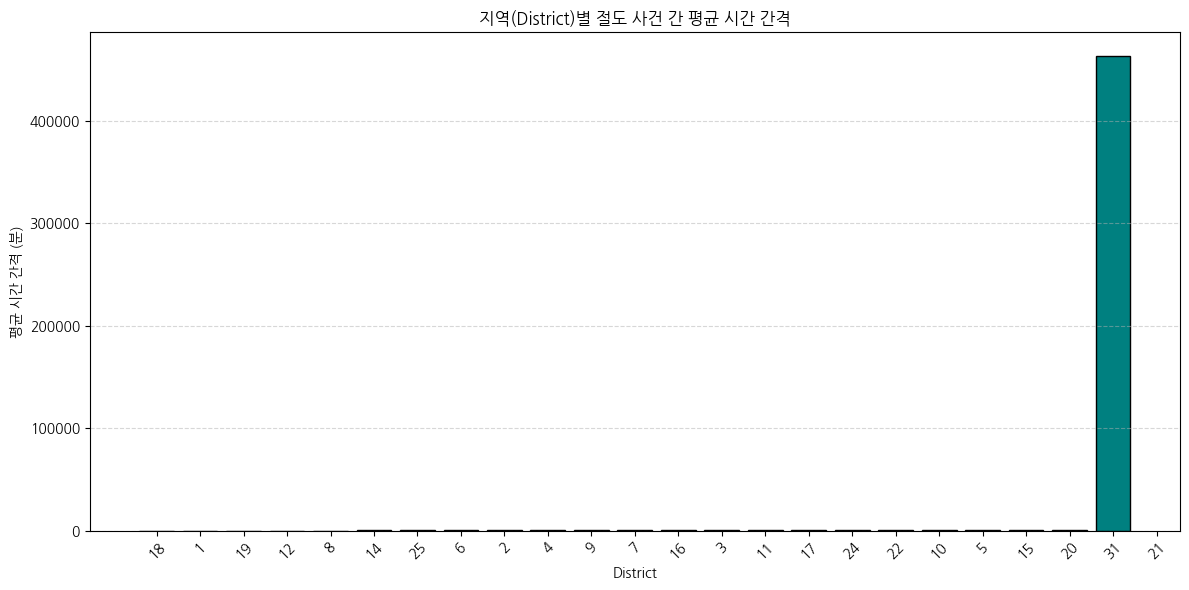

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(gap_df["District"].astype(str), gap_df["Mean_Gap_Min"], color='teal', edgecolor='black')
plt.title("ÏßÄÏó≠(District)Î≥Ñ Ï†àÎèÑ ÏÇ¨Í±¥ Í∞Ñ ÌèâÍ∑† ÏãúÍ∞Ñ Í∞ÑÍ≤©")
plt.xlabel("District")
plt.ylabel("ÌèâÍ∑† ÏãúÍ∞Ñ Í∞ÑÍ≤© (Î∂Ñ)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
count_31 = df_theft[df_theft["District"] == 31].shape[0]
print(f"District 31 ÎÇ¥ Ï†àÎèÑ ÏÇ¨Í±¥ Ïàò: {count_31}Í±¥")

df_theft_31 = df_theft[df_theft["District"] == 31]
print(df_theft_31["Date"].min(), "~", df_theft_31["Date"].max())

import folium

map_center = [df_theft_31["Latitude"].mean(), df_theft_31["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=12)

for _, row in df_theft_31.sample(min(100, len(df_theft_31))).iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

m


District 31 ÎÇ¥ Ï†àÎèÑ ÏÇ¨Í±¥ Ïàò: 16Í±¥
2003-07-24 12:00:00 ~ 2016-10-08 01:05:00


In [ ]:
# ÌèâÍ∑† ÏãúÍ∞Ñ Í∞ÑÍ≤© ÏÉÅÏúÑ 5Í∞ú ÏßÄÏó≠ Ï∂úÎ†•
gap_df.sort_values("Mean_Gap_Min", ascending=False).head()

District   Mean_Gap_Min
24        31  463156.333333
18        20     243.897477
13        15     227.238734
4          5     174.159012
9         10     169.776540

In [ ]:
sorted(df['Primary Type'].unique())

['ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'DOMESTIC VIOLENCE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON - CRIMINAL',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'RITUALISM',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION']

In [ ]:
df["Location Description"].unique()

array(['RESIDENCE', 'OTHER', 'APARTMENT', 'RESIDENCE PORCH/HALLWAY',
       'GAS STATION', 'COMMERCIAL / BUSINESS OFFICE', 'STREET', 'BANK',
       'SMALL RETAIL STORE', 'DEPARTMENT STORE', 'SIDEWALK',
       'APPLIANCE STORE', 'HOTEL/MOTEL', 'MEDICAL/DENTAL OFFICE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY',
       'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'DAY CARE CENTER',
       'RESTAURANT', 'COLLEGE/UNIVERSITY GROUNDS',
       'SCHOOL, PUBLIC, BUILDING', 'HOSPITAL BUILDING/GROUNDS',
       'WAREHOUSE', 'FACTORY/MANUFACTURING BUILDING',
       'SCHOOL, PRIVATE, GROUNDS', 'GROCERY FOOD STORE', 'CHA APARTMENT',
       'SCHOOL, PUBLIC, GROUNDS', 'VEHICLE NON-COMMERCIAL',
       'GOVERNMENT BUILDING/PROPERTY', 'AIRPORT/AIRCRAFT',
       'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
       'POLICE FACILITY/VEH PARKING LOT', 'TAVERN/LIQUOR STORE',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE-GARAGE',
       'PARK PROPERTY', 'CHA PARKING LOT/GROUNDS', 'ABANDONED BUILDING'

In [ ]:
type_translation = {
    'ARSON': 'Î∞©Ìôî',
    'ASSAULT': 'Ìè≠ÌñâÏúÑÌòë',
    'BATTERY': 'Ìè≠Ìñâ',
    'BURGLARY': 'Ï£ºÍ±∞Ïπ®ÏûÖ',
    'CONCEALED CARRY LICENSE VIOLATION': 'Ï¥ùÍ∏∞ÏÜåÏßÄÌóàÍ∞Ä ÏúÑÎ∞ò',
    'CRIM SEXUAL ASSAULT': 'Í∞ïÍ∞Ñ',
    'CRIMINAL DAMAGE': 'Ïû¨ÏÇ∞ÏÜêÍ¥¥',
    'CRIMINAL TRESPASS': 'Î¨¥Îã®Ïπ®ÏûÖ',
    'DECEPTIVE PRACTICE': 'ÏÇ¨Í∏∞',
    'DOMESTIC VIOLENCE': 'Í∞ÄÏ†ïÌè≠Î†•',
    'GAMBLING': 'ÎèÑÎ∞ï',
    'HOMICIDE': 'ÏÇ¥Ïù∏',
    'HUMAN TRAFFICKING': 'Ïù∏Ïã†Îß§Îß§',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Í≥µÎ¨¥ÏßëÌñâÎ∞©Ìï¥',
    'INTIMIDATION': 'ÌòëÎ∞ï',
    'KIDNAPPING': 'Ïú†Í¥¥',
    'LIQUOR LAW VIOLATION': 'Ï£ºÎ•òÎ≤ï ÏúÑÎ∞ò',
    'MOTOR VEHICLE THEFT': 'Ï∞®ÎüâÏ†àÎèÑ',
    'NARCOTICS': 'ÎßàÏïΩ',
    'NON - CRIMINAL': 'ÎπÑÎ≤îÏ£Ñ',
    'NON-CRIMINAL': 'ÎπÑÎ≤îÏ£Ñ',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'ÎπÑÎ≤îÏ£Ñ(ÌäπÏ†ïÎåÄÏÉÅ)',
    'OBSCENITY': 'Ïô∏ÏÑ§ÌñâÏúÑ',
    'OFFENSE INVOLVING CHILDREN': 'ÏïÑÎèôÎ≤îÏ£Ñ',
    'OTHER NARCOTIC VIOLATION': 'Í∏∞ÌÉÄ ÎßàÏïΩ Î≤îÏ£Ñ',
    'OTHER OFFENSE': 'Í∏∞ÌÉÄÎ≤îÏ£Ñ',
    'PROSTITUTION': 'ÏÑ±Îß§Îß§',
    'PUBLIC INDECENCY': 'Í≥µÍ≥µÏô∏ÏÑ§',
    'PUBLIC PEACE VIOLATION': 'Í≥µÍ≥µÏßàÏÑúÏúÑÎ∞ò',
    'RITUALISM': 'ÏùòÏãùÏ†Å Î≤îÏ£Ñ',
    'ROBBERY': 'Í∞ïÎèÑ',
    'SEX OFFENSE': 'ÏÑ±Î≤îÏ£Ñ',
    'STALKING': 'Ïä§ÌÜ†ÌÇπ',
    'THEFT': 'Ï†àÎèÑ',
    'WEAPONS VIOLATION': 'Î¨¥Í∏∞ÏÜåÏßÄ ÏúÑÎ∞ò'
}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
from joblib import Parallel, delayed

#  Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df['Date'] = pd.to_datetime(df['Date'])
df.dropna(subset=['X Coordinate', 'Y Coordinate'], inplace=True)

#  Í∞Å BeatÏóêÏÑú Í∞ÄÏû• ÎπàÎ≤àÌïú ÏÉÅÏúÑ 3Í∞ÄÏßÄ Î≤îÏ£Ñ ÏÑ†Ï†ï
top3_crimes_by_beat = (
    df.groupby(['Beat', 'Primary Type']).size()
    .reset_index(name='Count')
    .sort_values(['Beat', 'Count'], ascending=[True, False])
    .groupby('Beat').head(3)
)

# Ï£ºÏöî Î≤îÏ£Ñ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
filtered_df = df.merge(top3_crimes_by_beat[['Beat', 'Primary Type']], on=['Beat', 'Primary Type'], how='inner').reset_index()

# BallTree Í∏∞Î∞ò Í≥µÍ∞Ñ Í≤ÄÏÉâ Ï§ÄÎπÑ (X/Y Ï¢åÌëú ÏÇ¨Ïö©)
coordinates = df[['X Coordinate', 'Y Coordinate']].values
tree = BallTree(coordinates, metric='euclidean')

# Îπ†Î•∏ Í≥µÍ∞Ñ Í≤ÄÏÉâ Ìï®Ïàò Ï†ïÏùò (X/Y Í∏∞Î∞ò)
def fast_crimes_after_event(tree, df, base_idx, days_interval, radius=100):
    base_date = df.loc[base_idx, 'Date']
    max_date = base_date + pd.Timedelta(days=days_interval)

    base_point = coordinates[base_idx].reshape(1, -1)

    date_mask = (df['Date'] > base_date) & (df['Date'] <= max_date)
    indices_within_radius = tree.query_radius(base_point, r=radius)[0]

    final_indices = indices_within_radius[date_mask.iloc[indices_within_radius].values]

    return df.iloc[final_indices]

# Î≥ëÎ†¨Ï≤òÎ¶¨Î•º Ïù¥Ïö©Ìïú Î∂ÑÏÑù ÏàòÌñâ
def analyze_crime_event(tree, df, idx):
    crime_row = df.iloc[idx]
    crimes_1day = fast_crimes_after_event(tree, df, idx, 1)
    crimes_7day = fast_crimes_after_event(tree, df, idx, 7)
    crimes_30day = fast_crimes_after_event(tree, df, idx, 30)

    return {
        'Beat': crime_row['Beat'],
        'Primary Type': crime_row['Primary Type'],
        'Crime Date': crime_row['Date'],
        '1day_count': len(crimes_1day),
        '7day_count': len(crimes_7day),
        '30day_count': len(crimes_30day),
        '1day_location_desc': crimes_1day['Location Description'].value_counts().to_dict(),
        '7day_location_desc': crimes_7day['Location Description'].value_counts().to_dict(),
        '30day_location_desc': crimes_30day['Location Description'].value_counts().to_dict(),
    }

# Î≥ëÎ†¨ Ï≤òÎ¶¨ Ïã§Ìñâ
results = Parallel(n_jobs=-1, backend='multiprocessing')(
    delayed(analyze_crime_event)(tree, df, idx) for idx in filtered_df.index
)

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
results_df = pd.DataFrame(results)

# Í≤∞Í≥º Ï†ÄÏû•
results_df.to_csv('crime_eda_results.csv', index=False)

# Í≤∞Í≥º ÌôïÏù∏
print(results_df.head())


<ipython-input-2-a86292794133>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/usr/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))


In [ ]:
# ÎÇ†Ïßú ‚Üí datetime Î≥ÄÌôò
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# ÌååÏÉù Î≥ÄÏàò
df['Hour'] = df['Date'].dt.hour
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# ÏãúÍ∞ÑÎåÄ Î≤îÏ£ºÌôî
def get_time_period(hour):
    if pd.isnull(hour): return None
    if 0 <= hour < 6: return 'ÏÉàÎ≤Ω'
    elif 6 <= hour < 12: return 'Ïò§Ï†Ñ'
    elif 12 <= hour < 18: return 'Ïò§ÌõÑ'
    else: return 'Ï†ÄÎÖÅ'

df['TimePeriod'] = df['Hour'].apply(get_time_period)

# Primary Type ‚Üí ÌïúÍ∏Ä Îß§Ìïë
type_translation = {
    'ARSON': 'Î∞©Ìôî', 'ASSAULT': 'Ìè≠ÌñâÏúÑÌòë', 'BATTERY': 'Ìè≠Ìñâ',
    'BURGLARY': 'Ï£ºÍ±∞Ïπ®ÏûÖ', 'CRIM SEXUAL ASSAULT': 'Í∞ïÍ∞Ñ',
    'CRIMINAL DAMAGE': 'Ïû¨ÏÇ∞ÏÜêÍ¥¥', 'CRIMINAL TRESPASS': 'Î¨¥Îã®Ïπ®ÏûÖ',
    'DECEPTIVE PRACTICE': 'ÏÇ¨Í∏∞', 'DOMESTIC VIOLENCE': 'Í∞ÄÏ†ïÌè≠Î†•',
    'GAMBLING': 'ÎèÑÎ∞ï', 'HOMICIDE': 'ÏÇ¥Ïù∏', 'HUMAN TRAFFICKING': 'Ïù∏Ïã†Îß§Îß§',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Í≥µÎ¨¥ÏßëÌñâÎ∞©Ìï¥', 'INTIMIDATION': 'ÌòëÎ∞ï',
    'KIDNAPPING': 'Ïú†Í¥¥', 'LIQUOR LAW VIOLATION': 'Ï£ºÎ•òÎ≤ï ÏúÑÎ∞ò',
    'MOTOR VEHICLE THEFT': 'Ï∞®ÎüâÏ†àÎèÑ', 'NARCOTICS': 'ÎßàÏïΩ',
    'NON - CRIMINAL': 'ÎπÑÎ≤îÏ£Ñ', 'NON-CRIMINAL': 'ÎπÑÎ≤îÏ£Ñ',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'ÎπÑÎ≤îÏ£Ñ(ÌäπÏ†ïÎåÄÏÉÅ)', 'OBSCENITY': 'Ïô∏ÏÑ§ÌñâÏúÑ',
    'OFFENSE INVOLVING CHILDREN': 'ÏïÑÎèôÎ≤îÏ£Ñ', 'OTHER NARCOTIC VIOLATION': 'Í∏∞ÌÉÄ ÎßàÏïΩ Î≤îÏ£Ñ',
    'OTHER OFFENSE': 'Í∏∞ÌÉÄÎ≤îÏ£Ñ', 'PROSTITUTION': 'ÏÑ±Îß§Îß§', 'PUBLIC INDECENCY': 'Í≥µÍ≥µÏô∏ÏÑ§',
    'PUBLIC PEACE VIOLATION': 'Í≥µÍ≥µÏßàÏÑúÏúÑÎ∞ò', 'RITUALISM': 'ÏùòÏãùÏ†Å Î≤îÏ£Ñ',
    'ROBBERY': 'Í∞ïÎèÑ', 'SEX OFFENSE': 'ÏÑ±Î≤îÏ£Ñ', 'STALKING': 'Ïä§ÌÜ†ÌÇπ',
    'THEFT': 'Ï†àÎèÑ', 'WEAPONS VIOLATION': 'Î¨¥Í∏∞ÏÜåÏßÄ ÏúÑÎ∞ò'
}
df['Î≤îÏ£ÑÌïúÍ∏Ä'] = df['Primary Type'].map(type_translation).fillna('Í∏∞ÌÉÄ')


In [ ]:
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_clean = df.dropna(subset=['Î≤îÏ£ÑÌïúÍ∏Ä', 'TimePeriod', 'Month', 'Year'])

# 1. ÏãúÍ∞ÑÎåÄ vs Î≤îÏ£ÑÏú†Ìòï
ct1 = pd.crosstab(df_clean['Î≤îÏ£ÑÌïúÍ∏Ä'], df_clean['TimePeriod'])
v1 = cramers_v(ct1)

# 2. Ïõî vs Î≤îÏ£ÑÏú†Ìòï
ct2 = pd.crosstab(df_clean['Î≤îÏ£ÑÌïúÍ∏Ä'], df_clean['Month'])
v2 = cramers_v(ct2)

# 3. Ïó∞ÎèÑ vs Î≤îÏ£ÑÏú†Ìòï
ct3 = pd.crosstab(df_clean['Î≤îÏ£ÑÌïúÍ∏Ä'], df_clean['Year'])
v3 = cramers_v(ct3)

# Í≤∞Í≥º Ï∂úÎ†•
print("Cram√©r's V ÎπÑÍµê:")
print(f"ÏãúÍ∞ÑÎåÄ vs Î≤îÏ£ÑÏú†Ìòï: {v1:.4f}")
print(f"Ïõî     vs Î≤îÏ£ÑÏú†Ìòï: {v2:.4f}")
print(f"Ïó∞ÎèÑ   vs Î≤îÏ£ÑÏú†Ìòï: {v3:.4f}")


Cram√©r's V ÎπÑÍµê:
ÏãúÍ∞ÑÎåÄ vs Î≤îÏ£ÑÏú†Ìòï: 0.1295
Ïõî     vs Î≤îÏ£ÑÏú†Ìòï: 0.0215
Ïó∞ÎèÑ   vs Î≤îÏ£ÑÏú†Ìòï: 0.0277
